In [1]:
import pandas as pd # numpy homojen verilerle çalışır. pandas ise heterojen verilerle çalışabilir.
import numpy as np # series bir boyutludur bir sutundan oluşur. dataframe ise satır ve sutundan oluşur 2 boyutludur.
import seaborn as sbn
import matplotlib.pyplot as plt
# bigdatan elde edilen verilerin yüzde1i analiz edilebilirdir. bunun için veri kalitesi çok önemlidir. pandas analizlerin daha kolay olmasını sağlar.
# model kurmak için veri ön işleme gerekir. ne kadar kaliteli veri varsa o kadar kaliteli bir model kurarız.

In [2]:
# gerçek hayatta veriler hemen analiz edilecek kadar temiz olmaz. elde ne kadar kaliteli varsa o kaqdar kaliteli model kurabiliriz.
# anaconda ile önemli kütüphaneleri otomatik olarak yüklü gelir direkt olarak kullanabiliriz.

# SERİES

In [3]:
obje = pd.Series([1,"Ali",3.5,"Hey"])
obje # bu bir seridir.
# series nedir tek boyutlu satır indexlemesi vs yapılan bir array tipi yapıdır. tek bir sutunu ifade eder aslında 
# dataframeler alt alta veya yan yana serieslerden oluşur. tek bir satır veya tek bir sutun alırsak eğer o zaman elimize bir seri geçer.
# veriler homojendir bir Series'te poandas'ta ise heterojen olabilir. 
# series homojen olduğu için farklı tipte veriler varsa o zaman uppercasting olur. Series'teki en yüksek tipe yükseltilir tüm veriler.
# eğer indexleme belirtmezsek o zaman otomatik olarak 0'dan indexleme yapmaya başlar.

0      1
1    Ali
2    3.5
3    Hey
dtype: object

In [4]:
objedf = pd.DataFrame(obje,columns=["Bilmem"],index=[1,2,3,4])
objedf # bir seriyi dataframeye çevirebiliriz.

,Bilmem
1,Ali
2,3.5
3,Hey
4,NaN


In [5]:
obje[1:] # istenen indexleme yapılabilir. obje[0] dese idim ilk veri gelirdi.

1    Ali
2    3.5
3    Hey
dtype: object

In [6]:
obje.iloc[1] # iloc ile satır indexine göre ama 0'dan başlanmış hali(satır indexlemesi ne olursa olsun).
# eğer index = ["a","b","c","d"] olarak belirtilmiş olsa idi  obje["b"]  demek obje.iloc[1]  olurdu.

'Ali'

In [7]:
puan = {"Ali":100,"Emre":100,"Ecem":67,"Ford":87,"Musti":89}
seri1 = pd.Series(puan)
seri1 # keyler satır indexlemesine geçer ve valueler value olur bir seride.


Ali      100
Emre     100
Ecem      67
Ford      87
Musti     89
dtype: int64

In [8]:
seri1["Ali"] # seri1["Ali"] = 120 yaparsak ahmetin değeri 120 olur direkt atama yapabiliriz.

100

In [9]:
seri1 > 85  # valuesi 85'den fazla olanlara True verir. olmayanlara ise False. Değerleri boolean olan bir seri döner.  sonra bu seriyi serinin içerisdine koyarak True olan verilerden oluşan bir Seri elde edebiliriz.

Ali       True
Emre      True
Ecem     False
Ford      True
Musti     True
dtype: bool

In [10]:
seri1[seri1>85] # sadece valuesi True olanlar gelir.    seri > 85 demek bize bir seri döner ve büyük olanlar True olmayanlar False alır bunu tekrar serinin içerisine koyarsak o zaman elimize uygun değerlerin olduğu bir seri geçer.

Ali      100
Emre     100
Ford      87
Musti     89
dtype: int64

In [11]:
seri1[seri1 < 80] = 83 # değeri 80'den küçük olanlara 83 atamış olduk
seri1

Ali      100
Emre     100
Ecem      83
Ford      87
Musti     89
dtype: int64

In [12]:
"Emre" in seri1 # eğer bu key varsa True verir yoksa False verir.
seri2 = seri1.copy() # Seriesler ve DataFrameler için .copy() kullanılabilir. böylece bellekte farklı yerlerde series ve dataframe elde ederiz.

In [13]:
seri1 / 10 #tüm veriler 10a bölünür seri1 /= 10 olsa idi kalıcı olarak bölünme olurdu.
# seri1 += 2 olsa idi tüm verilere 2 eklenmiş olurdu örnek olarak. seri1 **= 2 olsa idi tüm verilerim karesi alınırdı.
seri1 **= 2
seri1

Ali      10000
Emre     10000
Ecem      6889
Ford      7569
Musti     7921
dtype: int64

In [14]:
bosluk = seri1.isnull()
bosluk # EĞER BİR veri null ise True yapacak değilse False yapacak null NaN olana True olmayana False verir ve yeni bir seri veya dataframe ile elde ettik ise dataframe verir.

Ali      False
Emre     False
Ecem     False
Ford     False
Musti    False
dtype: bool

## SERİES İLE ÇALIŞMAK(WORKİNG WİTH SERİES)

In [15]:
games = pd.read_csv("vgsalesGlobale.csv") # eğer bölünme virgül değil başka bir şey ile yapıldı ise sep ile belirleme yaparız. sep = ";" demek noktalı virgüllere göre ayır demektir.
games.head() # default olarak ilk 5 veriyi getirir.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
print(games.columns) # tüm kolonların isimlerini görebiliriz.

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [17]:
print(games.dtypes) # tüm kolonların veri tiplerini alırız.  kolonların veri tipleri birbirinden farklı olabilir bir dataframe heterojen olabilir. bir series ise homojon olur. 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [18]:
games.Genre.describe() # .describe() ile yapı hakkında bilgi alırız.  games["Genre"].describe() da yapabilirdik.

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

In [19]:
games.Genre.value_counts() # Gendre'de olan veriler ve sayılarını görebiliriz.
# games.Genre.value_counts(normalize = True) # bu şekilde bakarsa bir seride olan verilerin tek tek o serinin yüzde kaçıno oluşturduğunu görebiliriz.
# games.Genre.unique() # bununla her veriyi tek adet olarak bir seri içerisinde görebiliriz. .nunuqiue() yaparsak kaç adet farklı veri var seride görebiliriz.

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [20]:
games.Genre.value_counts(normalize = True) * 100 # her bir değerin serinin yüzde kaçını temsil ettiğini görebiliriz.

Action          19.978311
Sports          14.134233
Misc            10.477166
Role-Playing     8.964936
Shooter          7.892517
Adventure        7.747921
Racing           7.525003
Platform         5.337993
Simulation       5.223521
Fighting         5.109049
Strategy         4.102904
Puzzle           3.506447
Name: Genre, dtype: float64

In [21]:
games.describe().T # tüm dataframe hakkında bilgi alabiliriz. # .T ile transpoz alınır yan çevrilir aslında tablo.

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [22]:
games.Global_Sales.mean() # ortalama değerini görürüz.

0.5374406555006628

In [23]:
%matplotlib inline 

<Axes: ylabel='Frequency'>

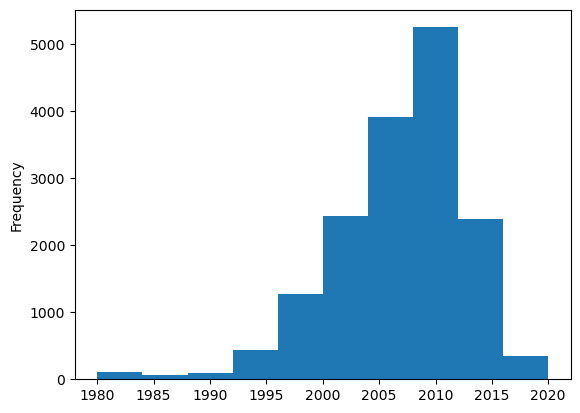

In [24]:
# bunu ekleyerek matplotlib'i import edebilir pandas ile kullanabiliriz matplotlib'i.
# %matplotlib inline   grafiği satır içerisinde görmek için yazılır.
games.Year.plot(kind = "hist") # yıl sutunun değerleri

<Axes: >

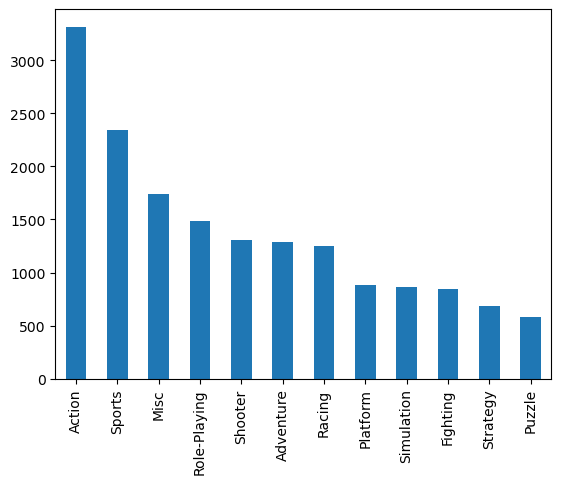

In [25]:
games.Genre.value_counts().plot(kind = "bar") # plot() içerisinde grafik türünü belirtiriz. kind ile grafik türünü belirleriz.

## DATAFRAME

In [26]:
data = {"name":["Emre","Ali","Can","Ayse","Alp","Nur","Buse"],"Nots":[90,80,70,75,95,60,65],"spor":["Futbol","Boks","Baskotbol","Tenis","Koşu","Ok","Karete"],"cinsiyet":["E","E","K","E","K","K","E"]}
df1 = pd.DataFrame(data,index=range(1,len(data["name"])+1))
df1.tail(3) # son 3 satırı gördük 5 ,6 ,7  şeklinde 3 yazmasak eğer o zaman sondan 5 veriyi getirirdi. 
# burada bir dict ile oluşturulan dataframede olan şey şudur.  keyler sutun indexlemesi için kullanılır. valueler ise değerler olur sırası ile sutunda yukarından aşağıya dizilir.  

,name,Nots,spor,cinsiyet
5,Alp,95,Koşu,K
6,Nur,60,Ok,K
7,Buse,65,Karete,E


In [27]:
sutunlarim = ["name","spor"]
df1[sutunlarim] # istenen sutunları alabiliriz.  df1[["name","spor"]] yapabilirdik.

,name,spor
1,Emre,Futbol
2,Ali,Boks
3,Can,Baskotbol
4,Ayse,Tenis
5,Alp,Koşu
6,Nur,Ok
7,Buse,Karete


In [28]:
df1.loc[1] # satırı seri halinde getiririz.  yatay bir parça olarak getirir bize...   .loc ve iloc ile satır üzerinden işlem yaparız satır sutun olarak ilerler.

name          Emre
Nots            90
spor        Futbol
cinsiyet         E
Name: 1, dtype: object

In [29]:
df1["yas"] = [12,13,54,65,88,66,12] # sonradan istersek bir sutun ekleyebiliriz.
df1.head()

,name,Nots,spor,cinsiyet,yas
1,Emre,90,Futbol,E,12
2,Ali,80,Boks,E,13
3,Can,70,Baskotbol,K,54
4,Ayse,75,Tenis,E,65
5,Alp,95,Koşu,K,88


In [30]:
df1["gecti"] = df1["Nots"] > 90 # bir seri elde ederiz ve bu seriyi sutun olarak ekleriz.
df1.head()

,name,Nots,spor,cinsiyet,yas,gecti
1,Emre,90,Futbol,E,12,False
2,Ali,80,Boks,E,13,False
3,Can,70,Baskotbol,K,54,False
4,Ayse,75,Tenis,E,65,False
5,Alp,95,Koşu,K,88,True


In [31]:
del df1["gecti"] # bu şekilde sutun silebiliriz.   del ile bellekten veya bir yapıdan silme işlemi yapabiliriz. del kalıcı değişim sağlar.

In [32]:
df1.head()

,name,Nots,spor,cinsiyet,yas
1,Emre,90,Futbol,E,12
2,Ali,80,Boks,E,13
3,Can,70,Baskotbol,K,54
4,Ayse,75,Tenis,E,65
5,Alp,95,Koşu,K,88


In [33]:
notlar = {"mat":{"ali":80,"emre":90,"ford":100,"nur":89},"fizik":{"ali":88,"emre":100,"ford":190,"nur":78}} # bunun yerine sıralı olarak değerleri yazar sonra indexleme ile belirtme yapabilirdik.
puan = pd.DataFrame(notlar)
# burada ise olan baş key sutun indexlemesi oldu. sonra value içerisindeki keyler örtüştüğü için value içerisindeki keyler ise satır indexlemesi için kullanıldı. valueler ise value olarak kullanıldı.
# indexleme için kullanılan isimlerde arada boşluk vs olmamalı buna dikkat etmek lazım.
puan.T   # transpoz alınabilir yani satır ve sutunlar yer değiştirebilir bir DataFramede...    df.T  yapısı ile. ama atama yapmadık kalıcı olmadı.

,ali,emre,ford,nur
mat,80,90,100,89
fizik,88,100,190,78


In [34]:
puan.index.name = "isim"   # index'e isim verdik...
puan.columns.name = "ders" # sutuna isim verdik.
puan 
# puan.values  ile biz bir dataframe'edeki setini iki boyutlu bir dizi haline getirir.  bir numpy array olur dataframe.  

ders,mat,fizik
isim,,
ali,80,88
emre,90,100
ford,100,190
nur,89,78


In [35]:
"""indeks = puan.index
indeks[1] = "can"
indeks"""  # indeks ile kalıcı değişim sağlayabiliriz böylece veriler değişmez. kilit mekanizması gibi.

'indeks = puan.index\nindeks[1] = "can"\nindeks'

## indeksleme,seçme,filtreleme(indexing,selecting,filtering)

In [36]:
object1 = pd.Series(np.arange(5),index = ["a","b","c","d","e"])
object1["a"]

0

In [37]:
object1[2:]

c    2
d    3
e    4
dtype: int32

In [38]:
object1[["a","c"]]

a    0
c    2
dtype: int32

In [39]:
object1[[2,4]] # direkt olarak indexe göre alım yaptık.

c    2
e    4
dtype: int32

In [40]:
object1[object1 < 2]

a    0
b    1
dtype: int32

In [41]:
object1["a":"c"] = 5  # a satırı ile c satırı arasına c dahil  5 değerini ata.
object1

a    5
b    5
c    5
d    3
e    4
dtype: int32

In [42]:
veri = pd.DataFrame(np.arange(16).reshape(4,4),index=["bursa","istanbul","ankara","rize"],columns=["bir","iki","uc","dort"])
veri.head()

,bir,iki,uc,dort
bursa,0,1,2,3
istanbul,4,5,6,7
ankara,8,9,10,11
rize,12,13,14,15


In [43]:
veri["iki"] # iki ismindeki sutun ve verileri geldi.  birden fazla sutun ve verileri gelsin istersek indexlemeler ise o zaman liste içerisinde df[["bir","iki"]] şeklinde yollarız.

bursa        1
istanbul     5
ankara       9
rize        13
Name: iki, dtype: int32

In [44]:
veri[veri["dort"] > 5] # dort sutunundaki 5den byük verilerin olduğu satırlar geldi indexleri ile beraber geldi.

,bir,iki,uc,dort
istanbul,4,5,6,7
ankara,8,9,10,11
rize,12,13,14,15


In [45]:
veri[veri["dort"] < 5] = 0 # dort sutunundaki 5den küçük veriler 0 oldu.   o satırdaki tüm verileri sıfır olur komple o ssatır ele alınır çünkü.
veri  # içerisine bir seri verdik o seri ile bize satırlar geldi satırlara işlem yaptık.

,bir,iki,uc,dort
bursa,0,0,0,0
istanbul,4,5,6,7
ankara,8,9,10,11
rize,12,13,14,15


In [46]:
# veri.loc  ve iloc  satır üzerinden ilerler. loc için etiket ismi kullanır. normal etiket ile sutun,satır.   loc ve iloc ile ise satır,sutun olarak ilerler.

veri.iloc[1,[1,2,3]] # 1. indexteki satırın 1. 2. 3. indexe sahip sutunları geldi.


iki     5
uc      6
dort    7
Name: istanbul, dtype: int32

In [47]:
veri.iloc[[1,2],[1,2,3]] # 1. ve 2. indexteki satırın 1. 2. 3. indexe sahip sutunları geldi.

,iki,uc,dort
istanbul,5,6,7
ankara,9,10,11


In [48]:
veri.loc["rize",["bir","iki"]]

bir    12
iki    13
Name: rize, dtype: int32

In [49]:
veri.loc[:"rize","dort"] # rizeye kadar olanların dort sutunu geldi. 

bursa        0
istanbul     7
ankara      11
rize        15
Name: dort, dtype: int32

In [50]:
veri = pd.Series(np.arange(5),index=[0,1,2,3,4])
# eğer indexleme belirlenmedi ise - index kullanamayız.     index =  ile indexleme olmadı ise o zaman eksi indexleme kullanamayız. 

In [51]:
# veri[-1] # hata alırız eğer index etiketi vermediysek. ama index=[0,1,2,3,4]  yaptığımız için bir sıkıntı olmadı.

## ÖNEMLİ METOTLAR

In [52]:
s = pd.Series([1,2,3,4],index=["a","b","c","d"])
s

a    1
b    2
c    3
d    4
dtype: int64

In [53]:
# .reindex demek verdiğimiz indexlere göre veriyi yeniden düzenleme demek indexleri değiştir demek değil. indexlerin karşısındaki veri ile haraket edecek sistem. istersen sonradan index ekletyebiliriz hazır olan serieste karşılığı uoksa o zaman NaN veri alır.
s2 = s.reindex(["b","d","a","c","e"]) # e ye değer atamadık. NaN oldu. istediğimiz index'i ekleyebiliriz reindex ile belirlenen indexlerin içinde normalde olan bir index varsa alınır yoksa NaN alır. eğer o index alınmadı ise verisi bellekten silinir.
s2 # s2["e"] =    ile atama yapabilirdik.

b    2.0
d    4.0
a    1.0
c    3.0
e    NaN
dtype: float64

In [54]:
s3 = pd.Series(["Mavi","Sarı","Mor"],index = [0,2,4])
s3

0    Mavi
2    Sarı
4     Mor
dtype: object

In [55]:
s3.reindex(range(6),method = "ffill") # boş olana yukarından değer verir.  reindex ile yeni bir indexleme kurarız. ve eşleşenler verilerini alır. method ile ise nasıl doldurulacak boş veriler bunu belirleriz. 


0    Mavi
1    Mavi
2    Sarı
3    Sarı
4     Mor
5     Mor
dtype: object

In [56]:
df2 = pd.DataFrame(np.arange(9).reshape(3,3),index=["a","c","d"],columns=["ali","efe","emre"])
df2.columns.name = "isimler"
df2.index.name = "indexler"
df2

isimler,ali,efe,emre
indexler,,,
a,0,1,2
c,3,4,5
d,6,7,8


In [57]:
df2 = df2.reindex(["d","c","b","a"]) # normalde d c a indexlerinde ne veriler varsa geldi b index'inde normalde olmadığı için sutun değerleri NaN oldu. 
df2

isimler,ali,efe,emre
indexler,,,
d,6.0,7.0,8.0
c,3.0,4.0,5.0
b,NaN,NaN,NaN
a,0.0,1.0,2.0


In [58]:
isim = ["efe","nur","ali"]
df2 =  df2.drop(axis = 0,index="b") # satır dropladık.  birden fazla droplamak istersek o zaman liste içerisinde indexleri gireriz.
df2.reindex(columns=isim) # kolon indexlemesi değiştirdik. # eşleşenler verilerini aldı olmayanlar ise NaN veriler ile donandı. normalde verileri olup adı yazılmayanlar ise yok oldu.

isimler,efe,nur,ali
indexler,,,
d,7.0,NaN,6.0
c,4.0,NaN,3.0
a,1.0,NaN,0.0


In [59]:
df2.loc[["c","d","a"]] # istenen sırada kullanabiliriz. istenen sırada gelir satırlar.

isimler,ali,efe,emre
indexler,,,
c,3.0,4.0,5.0
d,6.0,7.0,8.0
a,0.0,1.0,2.0


In [60]:
s4 = pd.Series(np.arange(5.),index = ["a","b","c","d","e"]) # sonuna nokta koyunca float olarak kullanır. 
s4

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [61]:
veri = pd.DataFrame(np.arange(16).reshape(4,4),index=["ali","can","nur","efe"],columns=list("ABCD"))  # list()  içerisine bir str verirsek tüm karakterleri tek tek bir listeye atar. ve bir liste döner.
veri

,A,B,C,D
ali,0,1,2,3
can,4,5,6,7
nur,8,9,10,11
efe,12,13,14,15


In [62]:
veri.drop("A",inplace=True,axis = 1) # sutun silemk için axis = 1 kullanılır. inplace True ile kalıcı olur. eğer axis belirtmezsek o zaman axis = 0 olur default olarak.   birden fazla sutun veya satır silmek istersek bir liste içeriisnde veririz bu değerleri.
veri

,B,C,D
ali,1,2,3
can,5,6,7
nur,9,10,11
efe,13,14,15


In [63]:
veri.mean(axis = 1) # tüm sutun ortalamaları geldi. satırlar için sutun ortalaması. eğer axis = 0 olsa idi tüm sutunlari için satırların ortalaması alınırdı.

ali     2.0
can     6.0
nur    10.0
efe    14.0
dtype: float64

In [64]:
veri.mean() # sutunların değerlerinin ortalamalarını görürürz yani sutunları görürüz. default olarak axis = 0 kabul edilir.

B    7.0
C    8.0
D    9.0
dtype: float64

## ARİTMETİK İŞLEMLER 

In [65]:
# mesela numpyde,serieste toplama yaparken aynı konumda aynı indexte olanlar toplanır.
# import pandas as pd; import numpy as np şeklinde import edebiliriz.
s1 = pd.Series(np.arange(4),index=["a","c","d","e"])
s2 = pd.Series(np.arange(5),index = ["a","c","e","f","g"])
s1 + s2 # biz burada aynı olanlar toplandı karşılığı olmayanlar katıldı ancak NaN veri aldı. mesela f'nin normalde değeri var ama öbür serieste karşılığı olmadığı için NaN veri aldı.
  # tüm indexler getirilir her biri bir kere olacak şekilde ikisinde de olanlar toplanır karşılığı olmayanlar ise NaN alır.

a    0.0
c    2.0
d    NaN
e    5.0
f    NaN
g    NaN
dtype: float64

In [66]:
df11 = pd.DataFrame(np.arange(6).reshape(2,3),columns=list("ABC"),index = ["ali","efe"])
df22 = pd.DataFrame(np.arange(9).reshape(3,3),columns=list("ABD"),index = ["ali","can","efe"])
df11 + df22 # satır ve sutun değerleri aynı olanlar toplandı. herhangi bir satır veya sutun indexi örtüşmeyen ise NaN aldı.
# sadece A B   ve  ali ile efe örtüştü yani onların değerleri olacak. diğerleri NaN alacak. satır ve sutun değerleri aynı olanlar toplandı olmayanlar ise NaN aldı.

,A,B,C,D
ali,0.0,2.0,NaN,NaN
can,NaN,NaN,NaN,NaN
efe,9.0,11.0,NaN,NaN


In [67]:
df11.add(df22,fill_value = 0) # örtüşmeyenlere 0 atanacak. ortusenler toplamacak. tek biri ortusen ise ayrı olarak kendi değerini alacak.

,A,B,C,D
ali,0.0,2.0,2.0,2.0
can,3.0,4.0,NaN,5.0
efe,9.0,11.0,5.0,8.0


In [68]:
1 / df11 # elemanların çarpmaya göre tersini almış oluruz. 1 / 0 tanımsızdır.

,A,B,C
ali,inf,1.00,0.5
efe,0.333333,0.25,0.2


In [69]:
df11 * 3 # tüm elemanlar 3 ile çarpılmış olur. numpy usulü bir çalışma vardır.
# df11.mul(3) yapabilirdik.

,A,B,C
ali,0,3,6
efe,9,12,15


In [70]:
s = df22.iloc[1]
print(s)
print(" ")
print(df22)
df22 - s # indexleri eşleşenler arasında çıkarma işlemi oldu.  indexler eşlenmeze eşleşmeyenlere NaN veri yazılır.   birseri çıkardık bir dataframeden yatay konumdan bir çıkarma oldu. 

A    3
B    4
D    5
Name: can, dtype: int32
 
     A  B  D
ali  0  1  2
can  3  4  5
efe  6  7  8


,A,B,D
ali,-3,-3,-3
can,0,0,0
efe,3,3,3


In [71]:
s2 = df22["A"]
print(s2)
print(" ")
print(df22)
print(" ")
df22.sub(s2,axis = 0)  # sutunlar arasında indexe göre çıkarma işlemi oldu.  tek tek soldan sağa aynı indexte olanlar birbiri ile çıkarılacak şekilde böyle bir işlem yapıldı. 
# numpy fonksiyonları pandas ile entegre çalışır.

ali    0
can    3
efe    6
Name: A, dtype: int32
 
     A  B  D
ali  0  1  2
can  3  4  5
efe  6  7  8
 


,A,B,D
ali,0,1,2
can,0,1,2
efe,0,1,2


### BİR FONKSİYONU UYGULAMAK

In [72]:
vs = pd.DataFrame(np.random.randn(4,3),columns=list("ABC"),index = ["ali","berk","can","efe"])
vs


,A,B,C
ali,0.098431,1.250225,-0.346474
berk,0.257227,-0.055449,1.512929
can,0.000557,1.693369,-0.882985
efe,-0.282385,-1.193271,-0.056244


In [73]:
np.abs(vs) # bir numpy metotu olan abs'yi kullanabiliriz.   tüm değerlerin mutlak değerini alır.

,A,B,C
ali,0.098431,1.250225,0.346474
berk,0.257227,0.055449,1.512929
can,0.000557,1.693369,0.882985
efe,0.282385,1.193271,0.056244


In [74]:
f = lambda x:x.max() - x.min()

In [75]:
vs.apply(f) # .apply()  ile bir DataFrame'ye fonksiyon uygulatabiliriz.
# bir seri döner bunun nedeni her sutunda farklı işlem olacak. her sutundaki en büyükle en küçükğün değeri bulunacak.
# eğer satırlardaki işlem olsun isterseydik. vs.apply(f,axis = 1) yapardık. satırlarda tek tek olurdu işlem ve bir seri elde ederdik.

A    0.539612
B    2.886640
C    2.395914
dtype: float64

## SIRALAMA

In [76]:
s = pd.Series(range(5),index=["e","d","a","b","c"])
s

e    0
d    1
a    2
b    3
c    4
dtype: int64

In [77]:
s.sort_index() # indexe göre sıralama yaptı...  a b c ... olarak sıraladı.  indeexler string olduğu için sıralama alfabeye göre yapıldılar.

a    2
b    3
c    4
d    1
e    0
dtype: int64

In [78]:
df = pd.DataFrame(np.arange(12).reshape(3,4),index=["iki","bir","uc"],columns=["d","a","b","c"])
df

,d,a,b,c
iki,0,1,2,3
bir,4,5,6,7
uc,8,9,10,11


In [79]:
df.sort_index() # axis = 0 olur default olarak. eğer axis = 1 yaparsak o zaman sutunlar sıralanır.  default olarak küçükten büyüğe sıralama olur ama istersek ascending = False ise büyükten küçüğe sıralama yapabiliriz.

,d,a,b,c
bir,4,5,6,7
iki,0,1,2,3
uc,8,9,10,11


In [80]:
df.sort_index(axis = 1) # bu seferde sutunlar isimlendirmelerine göre sıralandırlar. axis = 1 olduğu için.

,a,b,c,d
iki,1,2,3,0
bir,5,6,7,4
uc,9,10,11,8


In [81]:
s2 = pd.Series([5,3,-1,9])
s2

0    5
1    3
2   -1
3    9
dtype: int64

In [82]:
s2.sort_values() # eksik veriler en sona atılır. ve veriye göre sıralama yapar.

2   -1
1    3
0    5
3    9
dtype: int64

In [83]:
df2 = pd.DataFrame({"a":[5,3,-1,9],"b":[1,-2,0,5]})
df2

,a,b
0,5,1
1,3,-2
2,-1,0
3,9,5


In [84]:
df2.sort_values(by = "b") # b sutunu için sıralanmıs oldu... birden fazla sutun için sıralama yapabiliriz.  by = ["a","b","c"...] olabilir sırası ile sıralama dikkate alınır. 
# gönderilen sutun veya sutunlara göre bulunduları satırlarında değerleri değilir.

,a,b
1,3,-2
2,-1,0
0,5,1
3,9,5


In [85]:
veri = pd.read_csv("vgsalesGlobale.csv")
veri.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [86]:
veri["Name"].sort_values() # tek bir sutun aldık bu bir seridir. sonra değerlerine göre sıralama yaptık ascii tablosuna göre sıralama oldu. 

4754                                 '98 Koshien
8357                  .hack//G.U. Vol.1//Rebirth
7107                .hack//G.U. Vol.2//Reminisce
8602     .hack//G.U. Vol.2//Reminisce (jp sales)
8304               .hack//G.U. Vol.3//Redemption
                          ...                   
627                                 uDraw Studio
7835                uDraw Studio: Instant Artist
15523               uDraw Studio: Instant Artist
470                   wwe Smackdown vs. Raw 2006
9135                ¡Shin Chan Flipa en colores!
Name: Name, Length: 16598, dtype: object

In [87]:
veri.sort_values("Name") # isme göre sıraladı ve tek tek tüm satırları getirdi. satırlar Name'deki sıralanmış verilere göre sıralandı.    

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4754,4756,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41
8357,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
7107,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
8602,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
8304,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...
627,628,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.46
7835,7837,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02,0.19
15523,15526,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00,0.02
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00


In [88]:
veri.sort_values("Year") # yıla göre sıralama yaptık. yılların bulundukları satırların değerleri değişmedi sıralamaları yıla göre değişti. yani sıralama satırın yıl sutununa göre yapıldı.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [89]:
veri.sort_values(["Year","Name"]) # iki tane parametreye göre sıralar.  önce yıla göre sırlama yaptı. sonra aynı yılda olanlara ise isme göre sıralama yaptı yani sıralama önceliği belirleriz.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...,...,...,...
7351,7353,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
15476,15479,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
11409,11411,Zero: Tsukihami no Kamen,Wii,NaN,Action,Nintendo,0.00,0.00,0.08,0.00,0.08
8899,8901,eJay Clubworld,PS2,NaN,Misc,Empire Interactive,0.07,0.06,0.00,0.02,0.15


## VERİYİ ÖZETLEME

In [90]:
df = pd.DataFrame([[2.4,np.NaN],[6.3,-5.3],[np.NaN,np.NaN],[0.75,-1.3]],index=["a","b","c","d"],columns=["bir","iki"])
df

,bir,iki
a,2.40,NaN
b,6.30,-5.3
c,NaN,NaN
d,0.75,-1.3


In [91]:
df.sum() # default  olarak axis = 0 sutunlardaki satırların toplamlarını verir.

bir    9.45
iki   -6.60
dtype: float64

In [92]:
df.sum(axis = 1) # satır satır sutunların toplamını buluruz.  # 

a    2.40
b    1.00
c    0.00
d   -0.55
dtype: float64

In [93]:
df.mean(axis = 1) # satırların ortalaması. eksik veriler ön tanımlı olarak ortalamaya dahil edilmedi.

a    2.400
b    0.500
c      NaN
d   -0.275
dtype: float64

In [94]:
df.mean(axis = 1,skipna=False) # içerisinde NaN olanın ortalamasını hesaplamadı parametre yüzünden.

a      NaN
b    0.500
c      NaN
d   -0.275
dtype: float64

In [95]:
df.idxmax() # sutunlara göre en fazla olanların satırları.

bir    b
iki    d
dtype: object

In [96]:
df.idxmin() # en küçüklerin satır değerleri.

bir    d
iki    b
dtype: object

In [97]:
df.idxmax(axis=1) # satırlara göre en fazla olanın sutun değerini alacağız.

a    bir
b    bir
c    NaN
d    bir
dtype: object

In [98]:
df.cumsum() # birikimli toplam. kümülatif toplam.  her sutundaki değerler sırayla toplanareak yazıldı. 

,bir,iki
a,2.40,NaN
b,8.70,-5.3
c,NaN,NaN
d,9.45,-6.6


In [99]:
 df.describe().T # özet bilgileri verir.

,count,mean,std,min,25%,50%,75%,max
bir,3.0,3.15,2.850000,0.75,1.575,2.4,4.35,6.3
iki,2.0,-3.30,2.828427,-5.30,-4.300,-3.3,-2.30,-1.3


In [100]:
# kolerasyon katsayısını bulmak için iris veri setini import edelim.
iris = pd.read_table("iris.txt") # txt veriyi read_table ile okuduk.
iris.head()

,Canak_yaprak_boyu,Canak_yaprak_eni,Tac_yaprak_boyu,Tac_yaprak_eni,Turu
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [101]:
iris["Tac_yaprak_boyu"].corr(iris["Tac_yaprak_eni"]) # aralarındaki kolerasyonu gösterir. 1 ile -1 arasında değer alır... 1'e yakınlaşmak demek aralarında müthiş bir ilişki var demektir.
# sutun.corr(sutun) yapısı ile hangi sutunlar arasında nasıl bir ilişki var görebiliriz.

0.9628654314027961

In [102]:
iris.corr() # tüm değişkenlerın ikili kolerasyonları.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3223800284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr() # tüm değişkenlerın ikili kolerasyonları.


,Canak_yaprak_boyu,Canak_yaprak_eni,Tac_yaprak_boyu,Tac_yaprak_eni
Canak_yaprak_boyu,1.000000,-0.117570,0.871754,0.817941
Canak_yaprak_eni,-0.117570,1.000000,-0.428440,-0.366126
Tac_yaprak_boyu,0.871754,-0.428440,1.000000,0.962865
Tac_yaprak_eni,0.817941,-0.366126,0.962865,1.000000


In [103]:
iris.cov() # ikili kovelans değerlerini getirir.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3998374953.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.cov() # ikili kovelans değerlerini getirir.


,Canak_yaprak_boyu,Canak_yaprak_eni,Tac_yaprak_boyu,Tac_yaprak_eni
Canak_yaprak_boyu,0.685694,-0.042434,1.274315,0.516271
Canak_yaprak_eni,-0.042434,0.189979,-0.329656,-0.121639
Tac_yaprak_boyu,1.274315,-0.329656,3.116278,1.295609
Tac_yaprak_eni,0.516271,-0.121639,1.295609,0.581006


In [104]:
iris.corrwith(iris.Canak_yaprak_boyu) # Canakyaprakboyu ile değer değerleri ikili kolerasyonlarını gördük.   iris'teki sutunlar ile corrwith içerisine ismini verdiğimiz sutun ile tüm sutunlarun kolerasyon değerlerini görebiliriz.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\844919191.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corrwith(iris.Canak_yaprak_boyu) # Canakyaprakboyu ile değer değerleri ikili kolerasyonlarını gördük.   iris'teki sutunlar ile corrwith içerisine ismini verdiğimiz sutun ile tüm sutunlarun kolerasyon değerlerini görebiliriz.


Canak_yaprak_boyu    1.000000
Canak_yaprak_eni    -0.117570
Tac_yaprak_boyu      0.871754
Tac_yaprak_eni       0.817941
dtype: float64

In [105]:
s = pd.Series(["b","b","b","b","c","c","a","a","a"])
s

0    b
1    b
2    b
3    b
4    c
5    c
6    a
7    a
8    a
dtype: object

In [106]:
s.unique()

array(['b', 'c', 'a'], dtype=object)

In [107]:
s.value_counts() # her değerin sıklığını görebiliriz. tüm değerleri unique olarak görürürz ve kaç adet olduğunu görürüz.

b    4
a    3
c    2
dtype: int64

In [108]:
x =  s.isin(["b","c"]) # b ve c'nin olduklarına True olmadığına False verir
x

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7    False
8    False
dtype: bool

## VERİ OKUMA VE YAZMA

In [109]:
# veriler virgül veya noktalı virgül ile ayrılmışsa .csv read_csv()  bir tab boşluk ile bölünmüşse o zaman read_table() ile okuruz. 
# sep = ","  dersek eğer o zaman virgüle göre böl demektir bu.   mesela   df = pd.read_table("data2.txt",sep = ",") yaparsak virgüle göre böleriz.
df = pd.read_table("data.txt")  
df

,name,score,sex
0,Tim,80,M
1,Tom,85,M
2,Kim,70,F
3,Sam,90,M
4,Efe,75,M


In [110]:
df1 = pd.read_table("data2.txt",sep=",",names=["isim","puan","cinsiyet"],index_col=["isim"]) # eğer tablo virgül ile bölünmüşse o zaman sep bile nasıl bölündüğünü belirtiriz. 
df1

,puan,cinsiyet
isim,,
Tom,80,M
Tim,85,M
Kim,70,M
Kate,90,F
Alex,75,F


In [111]:
df1 = pd.read_table("data2.txt",sep=",",header=None) # header = None ile başlıkları sileriz ve sıfırdan bir indexleme kurulur.
df1

,0,1,2
0,Tom,80,M
1,Tim,85,M
2,Kim,70,M
3,Kate,90,F
4,Alex,75,F


In [112]:
df2 = pd.read_table("data3.txt",sep=",")  
df2

,lesson,name,one,two
0,Math,Kim,80,85
1,Math,Tim,90,70
2,Math,Tom,70,95
3,Stat,Kate,65,90
4,Stat,Alex,85,80
5,Stat,Sam,55,70


In [113]:
df3 = pd.read_table("data4.txt",sep=",",skiprows=[0,2])  # 1. ve 3. satırı okumayacak satır atlama yapacağız. bunun sebebi bu veri setindeki açıklama satırlarını görmemek istedik bundandır.   usecols = []   ile ise hangileri kullanılacak bunu belirleyebiliriz.
df3

,name,score,sex
0,Tim,80,M
1,Kate,85,F
2,Alex,70,M
3,Tom,90,M
4,Kim,75,F


In [114]:
eksikveri = {"score":[-5],"sex":["n.a","Tom"]} # score'de -5 olan sex'de isse n.a ve Tom olan NaN olacak bir dict içerisinde sutun ve NaN olacak verileri belirleriz.
df4 = pd.read_table("data5.txt",sep=",",na_values=eksikveri) # içinde eksik veriler olan bir dataset kullandık.  na_values = ["n.a",-5] dersek na ve -5 NaN veri olur
df4

,name,score,sex
0,Tim,80.0,NaN
1,Tom,NaN,NaN
2,Kate,70.0,NaN
3,NaN,90.0,K
4,Kim,NaN,K


In [115]:
df4.isnull() # True eksik değer False eksik olmayan değer demek.

,name,score,sex
0,False,False,True
1,False,True,True
2,False,False,True
3,True,False,False
4,False,True,False


df = pd.read_table("data.txt")
df

In [116]:
df.to_csv("yeni_veri.csv") # csv olarak kaydedilecek df...   sistemin çalıştığı path üzerine isim verdiğimiz dosya gelecek.

In [117]:
import sys
df.to_csv(sys.stdout,sep = "|",na_rep="NULL",index=False,header=False) # her değeri | ile bölmüş olarak bölmüş olduk.  na_rep ile eksik veriler nasıl gözükecek bunu belirleriz.  index = False yaparak satır indexlerini kaldırdık., header = False yaparak sutun indexlerini kaldırdık.
# istersek path verebiliriz. ama sys.stdout ile biz ekrana yazdırmasını istedik. ama path verirsek kaydederiz.

Tim|80|M
Tom|85|M
Kim|70|F
Sam|90|M
Efe|75|M


In [118]:
import sys
# DataFrame.to... ile bir yere yazdırma yapabiliriz. 

df.to_csv(sys.stdout,sep = "-",na_rep="NULL",index=False,columns=["name","sex"]) # colums ile hangilerinin geleceğini belirledik. istenen kolonlar gelecek.↔

name-sex
Tim-M
Tom-M
Kim-F
Sam-M
Efe-M


In [119]:
df.to_csv("fordFocus.csv",sep = "-",na_rep="NULL",index=False,columns=["name","sex"])

## EKSİK VERİ - KAYIP VERİ

In [120]:
s = pd.Series(["ege",np.NaN,"ali","eda"])
s

0    ege
1    NaN
2    ali
3    eda
dtype: object

In [121]:
s.isnull() # True olan NaN veridir.

0    False
1     True
2    False
3    False
dtype: bool

In [122]:
s.notnull() # Null olmayanlar True alır.  isnull'da Null olanlar True alır notnull'da False alır.

0     True
1    False
2     True
3     True
dtype: bool

In [123]:
s[3] = None
s.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [124]:
s.dropna()


0    ege
2    ali
dtype: object

In [125]:
s[s.notnull()]

0    ege
2    ali
dtype: object

In [126]:
from numpy import nan as NA # numpy içinden nan çağırdık ve NA ismi ile kullandık. 

In [127]:
df = pd.DataFrame([[1,2,3],[4,NA,5],[NA,NA,NA]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [128]:
df.dropna() # eksik veri olan satırları silinir.

,0,1,2
0,1.0,2.0,3.0


In [129]:
df.dropna(how = "all") # tüm hepsi NaN olursa siler o satırı axis ile sutun üzerinde de yapabiliriz. işlemleri. tüm değerleri NaN olan satır silinmiş oldu çünkü default olarak axis = 0 olur

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0


In [130]:
df[1] = NA
df.dropna(axis = 1,how = "all") # inplace = True kullanırsak eğer kalıcı bir değişim olur.

,0,2
0,1.0,3.0
1,4.0,5.0
2,NaN,NaN


In [131]:
df.dropna(thresh=1) # en az bir NaN olmayan değeri olan silinmez. öbürleri silinir. axis default olarak 0'dır.   thresh = 2 olursa 2 veya daha fazla NaN olmayan veri varsa dokunulmaz değilse silinir.

,0,1,2
0,1.0,NaN,3.0
1,4.0,NaN,5.0


In [132]:
df.fillna(0) # NaN olan verilere 0 atadık...

,0,1,2
0,1.0,0.0,3.0
1,4.0,0.0,5.0
2,0.0,0.0,0.0


In [133]:
df.fillna({0:15,1:25,2:35}) # 0 sutundaki boş verilere 15   1 sutunundaki NaN verilere 25....

,0,1,2
0,1.0,25.0,3.0
1,4.0,25.0,5.0
2,15.0,25.0,35.0


In [134]:
df = pd.DataFrame([[1,2,3],[4,NA,5],[NA,NA,NA]])
df.fillna(method="ffill") # her NaN metotdun yerine bir üst satırdaki veri atandı.  

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,5.0
2,4.0,2.0,5.0


In [135]:
df.fillna(method="ffill",limit=1) # sadece bir tane eksik veri tamamlanır limit ile.

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,5.0
2,4.0,NaN,5.0


In [136]:
veri = pd.Series([1,0,NA,5])
veri

0    1.0
1    0.0
2    NaN
3    5.0
dtype: float64

In [137]:
veri.fillna(veri.mean()) # eksik yerleri ortalama ile doldurduk...

0    1.0
1    0.0
2    2.0
3    5.0
dtype: float64

In [138]:
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [139]:
df.fillna(df.mean()) # her sutundaki eksik veri yerine bulunduğu sutunun ortalaması yazıldı.    
# ortalamaya eksik veri dahil edilmez. mesela 3 değer var 1 4 ve NaN o zaman fillna sonucu NaN veri 2.5 olur. 
# yani df.mean() diyince elimize bir seri geçer buda her sutunun ortalamasıdır bunu fillna'ya verince ise her sutunun ortalaması bulunduğu sutunun NaN verisi yerine yazılacak.

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,5.0
2,2.5,2.0,4.0


## VERİ DÖNÜŞTÜRME

In [140]:
veri = pd.DataFrame({"a":["bir","iki"]*3,"b":[1,1,2,3,2,3]})
veri

,a,b
0,bir,1
1,iki,1
2,bir,2
3,iki,3
4,bir,2
5,iki,3


In [141]:
veri.duplicated() # tekrar eden verileri gösterir. ilk veriden sonra aynısı gelirse o zaman tekrar eden olarak gözükür.. sondan başlayarak tekrar eden verileri görmek istersek keep = "last" ekleriz parametre olarak.  (bu bir dataframe olduğu için satırlar üzerinden işlem yaptı tüm değerleri aynı olan satırlara ilkine False ondan sonrakilere True diyecek.)

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [142]:
veri.drop_duplicates() # tekrar edenler silinir. ama satırın tüm elemanları aynı ise duplicated olan satırlar silinir.

,a,b
0,bir,1
1,iki,1
2,bir,2
3,iki,3


In [143]:
veri["c"] = range(6)
veri.duplicated(["a"]) # a sutunu için tekrar eden verileri görebiliriz.        veri.duplicated(["a","b"])  böyle yaparsak sadece a ve b arasında duplicated araması yapabiliriz.

0    False
1    False
2     True
3     True
4     True
5     True
dtype: bool

In [144]:
vs = pd.DataFrame({"isim":["ali","can","nur","efe","ata"],"puan":[60,50,70,80,40]})
vs

,isim,puan
0,ali,60
1,can,50
2,nur,70
3,efe,80
4,ata,40


In [145]:
sinif = {"ali":"A","can":"A","nur":"B","efe":"B","ata":"A"}
ad = vs["isim"]
vs["sube"] = ad.map(sinif) # isimlerin karşısındaki değerleri atarız. 
vs

,isim,puan,sube
0,ali,60,A
1,can,50,A
2,nur,70,B
3,efe,80,B
4,ata,40,A


In [146]:
nt = pd.Series([80,70,90,60])
nt

0    80
1    70
2    90
3    60
dtype: int64

In [147]:
nt[nt == 90] = NA # nt.replace(90,np.NaN) # yapabilirdik...
nt 

0    80.0
1    70.0
2     NaN
3    60.0
dtype: float64

In [148]:
nt.replace([70,60],[np.NaN,0]) # 70 yerine NaN 60 yerine 0 yazıldı birden fazla değişim yapabiliriz aynıı anda.   birden fazla veri değiştirceksek liste içerisinde aynı indexte olanlar değişirler.

0    80.0
1     NaN
2     NaN
3     0.0
dtype: float64

In [149]:
nt.replace({60:100,80:40,np.NaN:200}) # birden fazla değişim yapabiliriz. 60 olan 100 olacak   80 olan 40 olacak NaN olan 200 olacak.

0     40.0
1     70.0
2    200.0
3    100.0
dtype: float64

In [150]:
df = pd.DataFrame(np.arange(12).reshape(3,4),index=[0,1,2],columns=["ali","efe","eda","can"])
df

,ali,efe,eda,can
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [151]:
s = pd.Series(["bir","iki","uc"])
df.index = s # index etiketini değiştirdik.  # index.name = ile ise indexlemeye isim verebiliriz.
df

,ali,efe,eda,can
bir,0,1,2,3
iki,4,5,6,7
uc,8,9,10,11


In [152]:
df.rename(index = str.title,columns=str.upper)  # rename içerisinde str fonksiyonlarını kullanarak biz değişim yapabiliriz. 

,ALI,EFE,EDA,CAN
Bir,0,1,2,3
Iki,4,5,6,7
Uc,8,9,10,11


In [153]:
df.rename(index = {"bir":"on"},columns={"can":"ata"}) # istenen index ismini değiştirebiliriz. inplace = True ile kalıcı hale getirebiliriz.  bir dict içeriisnde key value ile değişecek ve glecek olarak belirleme yapabiliriz.  inplace = True ile kalıcı hale getirebiliriz.

,ali,efe,eda,ata
on,0,1,2,3
iki,4,5,6,7
uc,8,9,10,11


In [154]:
nt = [30,80,40,90,60,45,95,75,55,100,65,85]
aralik = [20,40,60,80,100]
puan = pd.cut(nt,aralik) # right = False yaparsak sol taraf kapalı parantez olur.
for i in set(puan): # tüm aralıkları görebiliriz. 
    print(i)

(20, 40]
(80, 100]
(40, 60]
(60, 80]


In [155]:
puan.codes # mesela 30 değeri 0. indexteki aralıkta 20 40 arası   80 değeri 2. indexteki aralıkta vs...

array([0, 2, 0, 3, 1, 1, 3, 2, 1, 3, 2, 3], dtype=int8)

In [156]:
puan.categories

IntervalIndex([(20, 40], (40, 60], (60, 80], (80, 100]], dtype='interval[int64, right]')

In [157]:
pd.value_counts(puan) # kategorilere göre veri sıklığını görebiliriz.

(80, 100]    4
(40, 60]     3
(60, 80]     3
(20, 40]     2
dtype: int64

In [158]:
isim = ["dusuk","orta","yuksek","tavan"]
pd.cut(nt,aralik,labels=isim,right = False) # right = False ile kapalı parantez sol kısma geçti...  veri,aralık,isimlendirme ve parantez kapalısı nerede olacak verebiliriz.
# pd.cut(veri,10) # dersek 10 aralığa böleriz verileri.

['dusuk', 'tavan', 'orta', 'tavan', 'yuksek', ..., 'yuksek', 'orta', NaN, 'yuksek', 'tavan']
Length: 12
Categories (4, object): ['dusuk' < 'orta' < 'yuksek' < 'tavan']

In [159]:
veri = np.random.randn(100)
x = pd.qcut(veri,4) # her değerin çeyrek aralığı gelir. veriyi çeyrek aralıklara ayrırırız.
x

[(0.596, 2.327], (-0.058, 0.596], (-0.058, 0.596], (0.596, 2.327], (-0.743, -0.058], ..., (-3.3729999999999998, -0.743], (-3.3729999999999998, -0.743], (-0.743, -0.058], (-0.743, -0.058], (-3.3729999999999998, -0.743]]
Length: 100
Categories (4, interval[float64, right]): [(-3.3729999999999998, -0.743] < (-0.743, -0.058] < (-0.058, 0.596] < (0.596, 2.327]]

In [160]:
veri = pd.DataFrame(np.random.randn(1000,4))
veri.head()

,0,1,2,3
0,-0.594734,0.473420,-1.247767,0.377245
1,-1.054694,-0.556065,-0.296566,0.434014
2,0.229284,-0.117481,0.187080,1.037797
3,1.411068,0.725543,0.709347,-1.509710
4,0.503986,-0.417813,-1.125273,0.227491


In [161]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000.0,-0.015206,0.989287,-2.891723,-0.650427,-0.002325,0.657708,2.967230
1,1000.0,0.022452,0.987077,-3.025006,-0.651704,-0.005823,0.674016,3.177502
2,1000.0,-0.028533,1.000680,-4.194211,-0.659084,-0.044707,0.625557,3.009202
3,1000.0,-0.049107,0.967906,-2.959192,-0.706309,-0.032038,0.602483,2.900038


In [162]:
sutun = veri[1] # 2. sutunu aldık.
# bu sutunda mutlak değeri 3'ü geçemleri bulacağız.
sutun[np.abs(sutun > 3)] 

649    3.177502
Name: 1, dtype: float64

In [163]:
np.sign(veri).head() # 1 demek pozitif -1 demek negatif sayı demektir.  böylece pozitif ve negatif olup olmadığını görebiliriz. 

,0,1,2,3
0,-1.0,1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,1.0
2,1.0,-1.0,1.0,1.0
3,1.0,1.0,1.0,-1.0
4,1.0,-1.0,-1.0,1.0


In [164]:
veri = pd.DataFrame(np.arange(12).reshape(4,3))
veri

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [165]:
sira = np.random.permutation(4) # 4e kadar olan sayıların rastgele permütasyonları.
sira

array([0, 2, 1, 3])

In [166]:
veri.take(sira) # take ile sıra değiştirdik satırların sıraları değişti.  take ile bir array veya liste veririz.  ve satırları o değerlere göre tekrar sıralar.  kalıcı değişim sağlar.  inplace = True demeye gerek yok.

,0,1,2
0,0,1,2
2,6,7,8
1,3,4,5
3,9,10,11


In [167]:
veri.sample() # rastgele bir satır seçti...   n = ?  demezsek default olarak 1 alır n.

,0,1,2
2,6,7,8


In [168]:
veri.sample(n = 2) # rastgele 2 tane satır seçti. kaç tane satır isteriz belirtebiliriz.

,0,1,2
3,9,10,11
2,6,7,8


In [169]:
veri = pd.DataFrame({"harf":["c","b","a","b","b","a"],"sayi":range(6)})
veri

,harf,sayi
0,c,0
1,b,1
2,a,2
3,b,3
4,b,4
5,a,5


In [170]:
pd.get_dummies(veri["harf"]) # her bir sutunda değeri olan ifadeye 1 olmayan ifadeye 0 atamak istersek get_dummies kullanıırız.       satır indexlemesi değişmez ve her unique değer bir sutun olur. o satırda olan 1 alır olmayan 2 alır.

,a,b,c
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
5,1,0,0


In [171]:
veri = np.random.randn(10)
veri

array([-0.74970574, -0.94644285,  0.55118318, -1.35412149,  0.86349853,
        1.5624997 , -0.11491846,  0.70342592,  1.0850049 ,  1.43539627])

In [172]:
# pd.get_dummies(pd.qcut(veri,4),dummy_na=True) # veri seti 4 aralığa ayrıldı. ve her değerin bulunduğu aralık bir ile gösterildi.

## HİYERARŞİK İNDEXLER(HİERARCHİCAL İNDEXİNG)

In [173]:
# bir eksen üzerinde birden fazla index seviyelerine olanak sağlar. çoklu indexler olarakta bilinir. 
veri = pd.Series(np.random.randn(8),index = [["a","a","a","b","b","b","c","c"],[1,2,3,1,2,3,1,2]])  # önce dış sonra iç index yazılır.
veri # birden fazla index var iki seviye index var.
# ilk 3 a sonraki 3 b sonraki 2 c oldu sayısına göre yer kapladu.

a  1    0.267598
   2   -0.365200
   3   -0.868020
b  1   -0.101045
   2    0.253358
   3   -1.220858
c  1   -0.324513
   2   -1.107824
dtype: float64

In [174]:
veri.index # MultiIndex olarak geçer. satır indexleri birden fazladır. burada index iki seviyeden oluşur.
# burada dış index ve iç index tam olarak gözükür.

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2)],
           )

In [175]:
veri["a"] # a indexe sahip veriler gelir. # bir seri olduğu için satırlar gelir yoksa .loc vs kullanmak lazım loc ve iloc satırlar üzerinden işlem yaparlar.

1    0.267598
2   -0.365200
3   -0.868020
dtype: float64

In [176]:
veri["b":"c"] # b indexinden c indexine kadar c dahil.  yani dış index üzerinden işlem yaoabiliriz.   bir seri olduğu için yoksa loc ve iloc kullanmak gerekecekti.

b  1   -0.101045
   2    0.253358
   3   -1.220858
c  1   -0.324513
   2   -1.107824
dtype: float64

In [177]:
veri.loc[["a","c"]] # a ve c indexlerine sahip değerler.  üst seviye indexleri aldık alt seviye indexleri ile beraber

a  1    0.267598
   2   -0.365200
   3   -0.868020
c  1   -0.324513
   2   -1.107824
dtype: float64

In [178]:
# içteki indexten veri seçme.
veri.loc[:,1] # :   ile tüm dış indexler  sonra virgül ile iç indexe geçeriz.  ve ondan sadece 1. indexi yani 2. elemanları alırız.  tüm dış indexlerin ikinici elemanı gelir.  virgül ile iç indexe geçeriz.

a    0.267598
b   -0.101045
c   -0.324513
dtype: float64

In [179]:
veri.unstack() # veriyi tablo haline getirebiliriz.

,1,2,3
a,0.267598,-0.365200,-0.868020
b,-0.101045,0.253358,-1.220858
c,-0.324513,-1.107824,NaN


In [180]:
veri.unstack().stack() # unstack olmuş veriyi stack hale getirebiliriz. .stack() ile.

a  1    0.267598
   2   -0.365200
   3   -0.868020
b  1   -0.101045
   2    0.253358
   3   -1.220858
c  1   -0.324513
   2   -1.107824
dtype: float64

In [181]:
vs = pd.DataFrame(np.arange(12).reshape(4,3),index=[["a","a","b","b"],[1,2,1,2]],columns=[["say","say","soz"],["mat","fiz","edb"]])
vs

say     soz
    mat fiz edb
a 1   0   1   2
  2   3   4   5
b 1   6   7   8
  2   9  10  11

In [182]:
vs.index.names = ["sinif","sinav"]
vs.columns.names = ["alan","ders"]
vs

alan        say     soz
ders        mat fiz edb
sinif sinav            
a     1       0   1   2
      2       3   4   5
b     1       6   7   8
      2       9  10  11

In [183]:
# verinin alt gruplarını seçmek isteyebiliriz.
vs["say"] 

ders         mat  fiz
sinif sinav          
a     1        0    1
      2        3    4
b     1        6    7
      2        9   10

In [184]:
vs.swaplevel("sinif","sinav") # sınıf ve sınav indexlerinin yeri değişecek.

alan        say     soz
ders        mat fiz edb
sinav sinif            
1     a       0   1   2
2     a       3   4   5
1     b       6   7   8
2     b       9  10  11

In [185]:
vs.sort_index(level=1) # seviye 1'e göre sıralandı. boş bırrakırsak 0. indexe göre sıralar.  0.index ve 1.index vardır. 1. index burada içte olandır.

alan        say     soz
ders        mat fiz edb
sinif sinav            
a     1       0   1   2
b     1       6   7   8
a     2       3   4   5
b     2       9  10  11

In [186]:
vs.sum(level= "sinav") # sınav seviyesine göre toplam değerler. aynı olan sınav seviyesi aynı olan satırları üst üste koyup topladı aynı konumdaki verileri topladı.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\1796249266.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  vs.sum(level= "sinav") # sınav seviyesine göre toplam değerler. aynı olan sınav seviyesi aynı olan satırları üst üste koyup topladı aynı konumdaki verileri topladı.


alan  say     soz
ders  mat fiz edb
sinav            
1       6   8  10
2      12  14  16

In [187]:
vs.sum(level="alan",axis = 1) # axis ile sutunlar arası toplama yapılacak demektir. level ile alanı belirledik.  aynı alan olan sutunlar toplanacak. 

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3142521235.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  vs.sum(level="alan",axis = 1) # axis ile sutunlar arası toplama yapılacak demektir. level ile alanı belirledik.  aynı alan olan sutunlar toplanacak.


alan         say  soz
sinif sinav          
a     1        1    2
      2        7    5
b     1       13    8
      2       19   11

In [188]:
veri = pd.DataFrame({"x":range(8),"y":range(8,0,-1),"a":["bir","bir","bir","bir","iki","iki","iki","iki"],"b":[0,1,2,3,0,1,2,3]})
veri

,x,y,a,b
0,0,8,bir,0
1,1,7,bir,1
2,2,6,bir,2
3,3,5,bir,3
4,4,4,iki,0
5,5,3,iki,1
6,6,2,iki,2
7,7,1,iki,3


In [189]:
veri2 = veri.set_index(["a","b"]) # a ve b sutunları satır indexleri oldu.  drop = False dersek a ve b sutunları satır indexi olur ve verileri kaybolmaz tabloda kalır.    a önce yazıldı dış index b ise iç index olacak.
veri2

x  y
a   b      
bir 0  0  8
    1  1  7
    2  2  6
    3  3  5
iki 0  4  4
    1  5  3
    2  6  2
    3  7  1

In [190]:
veri2.reset_index() # reset_index() ile veriseti eski haline gelmiş olur. 

,a,b,x,y
0,bir,0,0,8
1,bir,1,1,7
2,bir,2,2,6
3,bir,3,3,5
4,iki,0,4,4
5,iki,1,5,3
6,iki,2,6,2
7,iki,3,7,1


## VERİ SETLERİNİ BİRLEŞTİRME

In [191]:
import pandas as pd; import numpy as np
v1 = pd.DataFrame({"anahtar":["a","b","c","c","d","e"],"say1":range(6)})
v2 = pd.DataFrame({"anahtar":["b","c","d","e"],"say2":range(4)})
print(v1)
print(v2)

  anahtar  say1
0       a     0
1       b     1
2       c     2
3       c     3
4       d     4
5       e     5
  anahtar  say2
0       b     0
1       c     1
2       d     2
3       e     3


In [192]:
pd.merge(v1,v2,on="anahtar") # anahtar sutununa göre bir birleştirme oldu. ortak olan değerler ile birleştirme yapıldı. ortak olan değer birinde bir tane diğerinde 3 tane varsa en çok kaç tane varsa o kadar yazılır. ve sutun sutun belli edilir mesela c birinde 2 tane birinde ise bir tane ve değeri bir o zaman iki satırda sayı2 kolonu bir değerini alır. 

,anahtar,say1,say2
0,b,1,0
1,c,2,1
2,c,3,1
3,d,4,2
4,e,5,3


In [193]:
v3 = pd.DataFrame({"anahtar":["a","b","c","c","d","e"],"say1":range(6),"rakam":["bir","uc","iki","bir","bir","iki"]})
v4 = pd.DataFrame({"anahtar":["b","c","d","e"],"say2":range(4),"rakam":["bir","bir","iki","iki"]})
# pd.merge(v3,v4,left_on="anahtar1",right_on="anahtar2",how = "inner") # eğer birleşecek olanların isimleri farklı ise iki datasette sırası ile left on ve right on ile ortak sutunu belirleriz daha doğrusu neye göre birleşecek bunu belirleriz.

In [194]:
pd.merge(v3,v4,on = ["anahtar"],how = "outer",suffixes=("A","B")) # suffixxes ile isimlendirme yapabiliriz hangisi nereden geldi belli edebiliriz.

,anahtar,say1,rakamA,say2,rakamB
0,a,0,bir,NaN,NaN
1,b,1,uc,0.0,bir
2,c,2,iki,1.0,bir
3,c,3,bir,1.0,bir
4,d,4,bir,2.0,iki
5,e,5,iki,3.0,iki


In [195]:
v1 = pd.DataFrame({"anahtar1":["a","b","c","c","d","e"],"say1":range(6)})
v2 = pd.DataFrame({"anahtar2":["b","c","d","e"],"say2":range(4)})
pd.merge(v1,v2,left_on="anahtar1",right_on="anahtar2",how = "inner")

,anahtar1,say1,anahtar2,say2
0,b,1,b,0
1,c,2,c,1
2,c,3,c,1
3,d,4,d,2
4,e,5,e,3


In [196]:
sag = pd.DataFrame([[1,2],[3,4],[5,6]],index=["a","c","d"],columns=["ali","nur"])
sol = pd.DataFrame([[7,8],[9,10],[11,12],[13,14]],index=["a","b","e","f"],columns=["efe","ata"])
print(sag)
print(sol)

   ali  nur
a    1    2
c    3    4
d    5    6
   efe  ata
a    7    8
b    9   10
e   11   12
f   13   14


In [197]:
pd.merge(sag,sol,right_index=True,left_index=True,how = "outer") # indexlere göre birleştirme yapılabildi.

,ali,nur,efe,ata
a,1.0,2.0,7.0,8.0
b,NaN,NaN,9.0,10.0
c,3.0,4.0,NaN,NaN
d,5.0,6.0,NaN,NaN
e,NaN,NaN,11.0,12.0
f,NaN,NaN,13.0,14.0


In [198]:
sol.join(sag,how = "outer")

,efe,ata,ali,nur
a,7.0,8.0,1.0,2.0
b,9.0,10.0,NaN,NaN
c,NaN,NaN,3.0,4.0
d,NaN,NaN,5.0,6.0
e,11.0,12.0,NaN,NaN
f,13.0,14.0,NaN,NaN


In [199]:
diger = pd.DataFrame([[1,3],[5,7],[9,11]],index=["a","b","f"],columns=["buse","sena"])
diger

,buse,sena
a,1,3
b,5,7
f,9,11


In [200]:
sol.join([sag,diger])

,efe,ata,ali,nur,buse,sena
a,7.0,8.0,1.0,2.0,1.0,3.0
b,9.0,10.0,NaN,NaN,5.0,7.0
e,11.0,12.0,NaN,NaN,NaN,NaN
f,13.0,14.0,NaN,NaN,9.0,11.0


In [201]:
dizi = np.arange(20).reshape(4,5)
np.concatenate([dizi,dizi],axis = 1)

array([[ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 15, 16, 17, 18, 19]])

In [202]:
veri1 = pd.Series([0,1],index = ["a","b"])
veri2 = pd.Series([2,3,4],index = ["c","d","e"])
veri3 = pd.Series([5,6],index = ["f","g"])
pd.concat([veri1,veri2,veri3],axis = 1,sort = False)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [203]:
pd.concat([veri1,veri2,veri3],axis = 1,sort = False,join = "inner") # indexlere göre kesişimi al demek ama olmadığı için bir  değer gelmez


,0,1,2


In [204]:
veri4 = pd.Series([10,11,12],index = ["a","b","c"])
pd.concat([veri1,veri2,veri4],axis = 1,sort = False,keys = ["bir","iki","uc"])

,bir,iki,uc
a,0.0,NaN,10.0
b,1.0,NaN,11.0
c,NaN,2.0,12.0
d,NaN,3.0,NaN
e,NaN,4.0,NaN


In [205]:
vs1 = pd.DataFrame(np.arange(6).reshape(3, 2), index = ["a" , "b" , "c" ], columns = [ "bir" , "iki"])
vs2 = pd.DataFrame(10 + np.arange(4).reshape(2, 2), index = ["a" , "c" ], columns = [ "uc" , "dort"])
pd.concat([vs1,vs2],axis = 1,keys = ["s1","s2"],sort = False)


s1        s2      
  bir iki    uc  dort
a   0   1  10.0  11.0
b   2   3   NaN   NaN
c   4   5  12.0  13.0

In [206]:
veri1 = pd.DataFrame(np.random.randn(3,4), columns = ["a","b","c","d"])
veri2 = pd.DataFrame(np.random.randn(2,3), columns = ["b","d","a"])
pd.concat([veri1,veri2],ignore_index=True,sort = False)

,a,b,c,d
0,0.684806,0.173029,-0.058536,2.177323
1,0.735955,2.076300,0.045310,0.407700
2,-0.424953,1.229297,0.371007,-0.145633
3,0.563135,-0.062198,NaN,2.017803
4,-1.417013,0.620278,NaN,0.699624


# VERİ SETİNİ TEKRAR DÜZENLEME

In [207]:
veri = pd.DataFrame(np.arange(16).reshape(4,4),index = [list("aabb"),[1,2] * 2],columns=[["say","say","soz","soz"],["mat","ing"] * 2])
veri # multiindex kullandık.

say     soz    
    mat ing mat ing
a 1   0   1   2   3
  2   4   5   6   7
b 1   8   9  10  11
  2  12  13  14  15

In [208]:
veri.index.names = ["sinif","sinav"]
veri.columns.names = ["alan","ders"]
veri

alan        say     soz    
ders        mat ing mat ing
sinif sinav                
a     1       0   1   2   3
      2       4   5   6   7
b     1       8   9  10  11
      2      12  13  14  15

In [209]:
uzun = veri.stack() #  veriyi uzun formata getirir.  .unstack() ile ise tekrar tablo haline getirebiliriz.
uzun

alan              say  soz
sinif sinav ders          
a     1     ing     1    3
            mat     0    2
      2     ing     5    7
            mat     4    6
b     1     ing     9   11
            mat     8   10
      2     ing    13   15
            mat    12   14

In [210]:
uzun.unstack() # eski haline geri getirmek için kullanırız.

alan        say     soz    
ders        ing mat ing mat
sinif sinav                
a     1       1   0   3   2
      2       5   4   7   6
b     1       9   8  11  10
      2      13  12  15  14

In [211]:
veri.stack(0) # 0. alan seviyesine göre veri seti uzun hale geldi. 

ders              ing  mat
sinif sinav alan          
a     1     say     1    0
            soz     3    2
      2     say     5    4
            soz     7    6
b     1     say     9    8
            soz    11   10
      2     say    13   12
            soz    15   14

In [212]:
veri.stack("alan") # alana göre uzatma oldu.

ders              ing  mat
sinif sinav alan          
a     1     say     1    0
            soz     3    2
      2     say     5    4
            soz     7    6
b     1     say     9    8
            soz    11   10
      2     say    13   12
            soz    15   14

In [213]:
s1 = pd.Series(np.arange(4),index = list("abcd"))
s2 = pd.Series(np.arange(6,9),index = list("cde"))
veri2 = pd.concat([s1,s2],keys = ["bir","iki"])
veri2

bir  a    0
     b    1
     c    2
     d    3
iki  c    6
     d    7
     e    8
dtype: int32

In [214]:
veri2.unstack() # seviyelerde olmayan veriler eksik veri olarak yazıldı.

,a,b,c,d,e
bir,0.0,1.0,2.0,3.0,NaN
iki,NaN,NaN,6.0,7.0,8.0


In [215]:
veri2.unstack().stack() # eksik veriler kaldırılarak geniş haldeki veri uzun hale getirildi. .stack() ile.  

bir  a    0.0
     b    1.0
     c    2.0
     d    3.0
iki  c    6.0
     d    7.0
     e    8.0
dtype: float64

In [216]:
veri2.unstack().stack(dropna = False) # böylece eksik verileri atmadan uzun format oluşturur.

bir  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
iki  a    NaN
     b    NaN
     c    6.0
     d    7.0
     e    8.0
dtype: float64

In [217]:
stok = pd.DataFrame({"meyve":["elma","erik","uzum"] * 2,"renk":["mor","sari"] * 3,"adet":[3,4,5,6,1,2]}) 
stok

,meyve,renk,adet
0,elma,mor,3
1,erik,sari,4
2,uzum,mor,5
3,elma,sari,6
4,erik,mor,1
5,uzum,sari,2


In [218]:
stok.pivot("meyve","renk","adet")

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\1505115181.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  stok.pivot("meyve","renk","adet")


renk,mor,sari
meyve,,
elma,3,6
erik,1,4
uzum,5,2


In [219]:
stok["deger"] = np.random.randn(len(stok))
stok

,meyve,renk,adet,deger
0,elma,mor,3,-0.098228
1,erik,sari,4,-0.236535
2,uzum,mor,5,-0.071289
3,elma,sari,6,1.751527
4,erik,mor,1,1.516590
5,uzum,sari,2,2.293153


In [220]:
p = stok.pivot("meyve","renk")
p

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\1884019790.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  p = stok.pivot("meyve","renk")


adet          deger          
renk   mor sari       mor      sari
meyve                              
elma     3    6 -0.098228  1.751527
erik     1    4  1.516590 -0.236535
uzum     5    2 -0.071289  2.293153

In [221]:
p["deger"]

renk,mor,sari
meyve,,
elma,-0.098228,1.751527
erik,1.516590,-0.236535
uzum,-0.071289,2.293153


In [222]:
veri = pd.DataFrame({"ders":["mat","fiz","edb"],"eda":[50,60,70],"efe":[80,70,90],"ali":[60,70,85]})
veri

,ders,eda,efe,ali
0,mat,50,80,60
1,fiz,60,70,70
2,edb,70,90,85


In [223]:
grup = pd.melt(veri,["ders"])
grup # melt ile uzun hale getirdik. melt pivotun tersidir.

,ders,variable,value
0,mat,eda,50
1,fiz,eda,60
2,edb,eda,70
3,mat,efe,80
4,fiz,efe,70
5,edb,efe,90
6,mat,ali,60
7,fiz,ali,70
8,edb,ali,85


In [224]:
data = grup.pivot("ders","variable","value")
data

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\2951439218.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = grup.pivot("ders","variable","value")


variable,ali,eda,efe
ders,,,
edb,85,70,90
fiz,70,60,70
mat,60,50,80


In [225]:
data.reset_index()

variable,ders,ali,eda,efe
0,edb,85,70,90
1,fiz,70,60,70
2,mat,60,50,80


# GRUPLAMA (GROUP BY)

In [226]:
# mesela veri setinde bir anahtar sutun olsun ona göre verileri ayırma yapılır. anahtar sutun demek kategorilerden oluşan sutun demektir.
vs = pd.DataFrame({"anahtar1":list("aabbab"),"anahtar2":["bir","iki","uc"] * 2,"veri1":np.random.randn(6),"veri2":np.random.randn(6)})
vs

,anahtar1,anahtar2,veri1,veri2
0,a,bir,0.018952,-1.066945
1,a,iki,0.323909,0.302323
2,b,uc,-0.014803,-1.119587
3,b,bir,0.987437,0.153982
4,a,iki,-0.285681,2.052982
5,b,uc,-1.333030,0.845888


In [227]:
grup = vs["veri1"].groupby(vs["anahtar1"])  # veri1'in değerlerini anahtar1'in değerlerine göre grupla demek.
grup # bir obje döner bize.

In [228]:
grup.mean() # anahtar1'e göre grupladı ve ortalama aldı.   # a ve b kategorilerine göre ayrıldı. sonrada ortalama alındı.

anahtar1
a    0.019060
b   -0.120132
Name: veri1, dtype: float64

In [229]:
orta = vs["veri1"].groupby([vs["anahtar1"],vs["anahtar2"]]).mean()  # birden fazla değere göre gruplarsak sırası ile önce dış sonra içtekiler değerlerine göre gruplanır. 
orta.unstack()

anahtar2,bir,iki,uc
anahtar1,,,
a,0.018952,0.019114,NaN
b,0.987437,NaN,-0.673917


In [230]:
vs.groupby("anahtar1").mean() # sadece sayısal olanlar işlem görür. mean() ile ortalama alırız. anahtar1 sutun olarak gelmez satır olarak gelir unique değerleri.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\2889878752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vs.groupby("anahtar1").mean() # sadece sayısal olanlar işlem görür. mean() ile ortalama alırız. anahtar1 sutun olarak gelmez satır olarak gelir unique değerleri.


,veri1,veri2
anahtar1,,
a,0.019060,0.429453
b,-0.120132,-0.039905


In [231]:
vs.groupby(["anahtar1","anahtar2"]).mean() # solda olan 0.index bir sağdaki 1.index oldu multi index yapısı ile gruplandırma oldu.  önce anahtar bir sonra anhatar1 içinde anahtar2 lere göre bir gruplama yaptı.

veri1     veri2
anahtar1 anahtar2                    
a        bir       0.018952 -1.066945
         iki       0.019114  1.177653
b        bir       0.987437  0.153982
         uc       -0.673917 -0.136849

In [232]:
for isim,grup in vs.groupby("anahtar1"): # bir dataframe'yi bir sutuna göre gruplarsak o sutunda aynı olan değerler bir grup olacak satırlarla beraber.  
    print(isim)
    print(grup)
    

a
  anahtar1 anahtar2     veri1     veri2
0        a      bir  0.018952 -1.066945
1        a      iki  0.323909  0.302323
4        a      iki -0.285681  2.052982
b
  anahtar1 anahtar2     veri1     veri2
2        b       uc -0.014803 -1.119587
3        b      bir  0.987437  0.153982
5        b       uc -1.333030  0.845888


In [233]:
for (x1,x2),grup in vs.groupby(["anahtar1","anahtar2"]): # burada iki tane parametre girilmiş... önce verilen parametrelerin kombinasyonlarına göre gruplama oldu.
    print(x1,x2)
    print(grup)

a bir
  anahtar1 anahtar2     veri1     veri2
0        a      bir  0.018952 -1.066945
a iki
  anahtar1 anahtar2     veri1     veri2
1        a      iki  0.323909  0.302323
4        a      iki -0.285681  2.052982
b bir
  anahtar1 anahtar2     veri1     veri2
3        b      bir  0.987437  0.153982
b uc
  anahtar1 anahtar2     veri1     veri2
2        b       uc -0.014803 -1.119587
5        b       uc -1.333030  0.845888


In [234]:
parca = dict(list(vs.groupby("anahtar1")))
parca["a"]

,anahtar1,anahtar2,veri1,veri2
0,a,bir,0.018952,-1.066945
1,a,iki,0.323909,0.302323
4,a,iki,-0.285681,2.052982


In [235]:
oyun = pd.read_csv("vgsalesGlobale.csv")
oyun.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [236]:
oyun.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [237]:
oyun.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


In [238]:
oyun.Global_Sales.mean()

0.5374406555006628

In [239]:
grup = oyun.groupby("Genre")

In [240]:
grup["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [241]:
grup.Global_Sales.describe() # grup["Global_Sales"].describe()  da yapabilirdik.

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [242]:
grup.mean()

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\626059466.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup.mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [243]:
%matplotlib inline

<Axes: xlabel='Genre'>

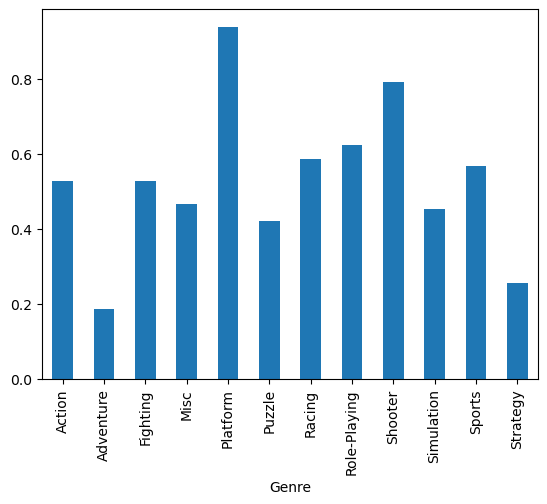

In [244]:
grup.Global_Sales.mean().plot(kind = "bar")  # df.plot(kind = ...) yapısı ile bir grafik kurduk.

In [245]:
meyve = pd.DataFrame(np.random.randn(4,4),columns=list("abcd"),index = ["elma","kiraz","muz","kivi"])
meyve

,a,b,c,d
elma,1.731463,-0.720645,1.613415,-0.467085
kiraz,0.804185,-0.267029,-0.139066,-2.494271
muz,-0.351840,1.411230,-0.592086,-0.063990
kivi,0.875161,-1.284651,-0.642498,-0.037029


In [246]:
etiket = {"a":"yesil","b":"sari","c":"yesil","d":"sari","e":"mor"}
grup = meyve.groupby(etiket,axis = 1)  # sutunlara göre gruplama yapacağımız için axis = 1 kullanırız.    e değeri olmadığı için hesaba katılmadı.
grup.sum()

,sari,yesil
elma,-1.18773,3.344878
kiraz,-2.76130,0.665119
muz,1.34724,-0.943926
kivi,-1.32168,0.232663


In [247]:
s = pd.Series(etiket)
s

a    yesil
b     sari
c    yesil
d     sari
e      mor
dtype: object

In [248]:
meyve.groupby(s,axis = 1).count() # kaç adet değerin örtüştüğünü görebiliriz. sutuna göre gruplama yaparız axis = 1 olduğu için.

,sari,yesil
elma,2,2
kiraz,2,2
muz,2,2
kivi,2,2


In [249]:
meyve.groupby(len).sum()

,a,b,c,d
3,-0.351840,1.411230,-0.592086,-0.063990
4,2.606623,-2.005296,0.970918,-0.504114
5,0.804185,-0.267029,-0.139066,-2.494271


In [250]:
veri = pd.DataFrame(np.random.randn(4,5),columns=[list("AAABB"),[1,2,3,1,2]])
veri.columns.names = ["harf","sayi"]
veri

harf         A                             B          
sayi         1         2         3         1         2
0     0.187552 -0.852408  0.286413 -0.627498  0.030297
1    -0.105899 -0.435246 -1.254678  0.769994  0.012911
2     0.327858 -0.877130  1.390988 -0.234264 -0.490382
3     0.424174 -0.885808 -1.646765  0.686970 -0.796216

In [251]:
veri.groupby(level = "harf",axis = 1).sum() # harf leveline göre gruplanacaklar. axis = 1 deriz sutunları gruplayacağız. sum ile eşlesen değerlerin toplamını alacağız.

harf,A,B
0,-0.378443,-0.597201
1,-1.795823,0.782905
2,0.841716,-0.724646
3,-2.108400,-0.109247


In [252]:
oyun = pd.read_csv("vgsalesGlobale.csv")
oyun.head()
print(oyun.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [253]:
grup = oyun.groupby("Genre")
grup.mean() 

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\623566674.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup.mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


<Axes: xlabel='Genre'>

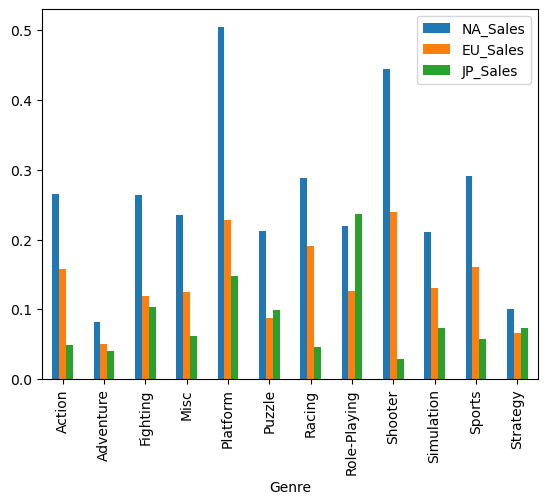

In [254]:
grup[["NA_Sales","EU_Sales","JP_Sales"]].mean().plot(kind = "bar") # gruplanmış verilerden istenen sutunları alırız ve ortalamalarını alırız sonra grafiğe dökeriz.

# GRUPLANMIŞ VERİLERE FONKSİYON UYGULAMAK

In [255]:
df=pd.DataFrame({"key":list("ABC")*2,
                 "data1":range(6),
                 "data2":np.arange(5,11)})
df 

,key,data1,data2
0,A,0,5
1,B,1,6
2,C,2,7
3,A,3,8
4,B,4,9
5,C,5,10


In [256]:
group=df.groupby("key") # key sutununun unique değerlerine göre gruplandılar.
group

In [257]:
group.aggregate(["min",np.median,"max"]) # tek tek hangi metotlar uygulanacak isimlerini yazarız. 

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     5    6.5   8
B       1    2.5   4     6    7.5   9
C       2    3.5   5     7    8.5  10

In [258]:
group.agg({"data1":"min","data2":"max"}) # data1 için min fonksiyonunu data2 için ise max fonksiyonunu uygula dedik eldeki nesneye. agg() ile.

,data1,data2
key,,
A,0,8
B,1,9
C,2,10


In [259]:
def f(x):
    return x.max()-x.min()
group.agg(f)  # agg. ile bir fonksiyonu uygulayabiliriz.  aggregate yerine agg yazabiliriz bir fark yok.

,data1,data2
key,,
A,3,3
B,3,3
C,3,3


## Applying more than one function

In [260]:
data=pd.DataFrame({"letter":list("ABC")*4,
                   "num":["one","two"]*6,
                   "d1":np.random.randn(12),
                   "d2":np.arange(10,33,2)})
data

,letter,num,d1,d2
0,A,one,1.168229,10
1,B,two,0.955296,12
2,C,one,-0.188742,14
3,A,two,-1.215629,16
4,B,one,1.188988,18
5,C,two,0.605586,20
6,A,one,-1.440300,22
7,B,two,0.394767,24
8,C,one,0.004425,26
9,A,two,-0.417492,28


In [261]:
group=data.groupby(["letter","num"])
group_d1=group["d1"] # d1 sutununu aldık buradan.
group_d1.agg("mean") # . mean() ' de yapabilirdik. ama böyle uygulattık fonksiyon isimleri tırnaklar içerisinde yazılır.


letter  num
A       one   -0.136036
        two   -0.816561
B       one    1.439440
        two    0.675032
C       one   -0.092159
        two   -0.417811
Name: d1, dtype: float64

In [262]:
group_d1.agg(["mean","std",f])

mean       std         f
letter num                              
A      one -0.136036  1.844508  2.608528
       two -0.816561  0.564368  0.798137
B      one  1.439440  0.354192  0.500904
       two  0.675032  0.396354  0.560529
C      one -0.092159  0.136590  0.193167
       two -0.417811  1.447302  2.046794

In [263]:
group_d1.agg([("f_mean","mean"),
              ("f_std",np.std)])  # fonksiyonlara istediğimiz isimleri verebiliriz bu yapı ile.

f_mean     f_std
letter num                    
A      one -0.136036  1.844508
       two -0.816561  0.564368
B      one  1.439440  0.354192
       two  0.675032  0.396354
C      one -0.092159  0.136590
       two -0.417811  1.447302

In [264]:

group.agg({"d1":["count","max","mean"],
           "d2":"sum"})  # d1'e uygulanacak metotlar ve d2'ye uygulanacak metotu yazdık. ve istediğimiz oldu.
# group.agg({"d1":["count","max","mean"],"d2":"sum"})["d1"] yapsa idik sadece d1 kısmını alırdık sutunlardan. ve uygulanmış metotları.

d1                      d2
           count       max      mean sum
letter num                              
A      one     2  1.168229 -0.136036  32
       two     2 -0.417492 -0.816561  44
B      one     2  1.689892  1.439440  48
       two     2  0.955296  0.675032  36
C      one     2  0.004425 -0.092159  40
       two     2  0.605586 -0.417811  52

In [265]:
data.groupby(["letter","num"], as_index=False).mean() # önce grupladık sonra as_index = False yaparak hiyerarşik istemiyoruz diye belirttik. 

,letter,num,d1,d2
0,A,one,-0.136036,16.0
1,A,two,-0.816561,22.0
2,B,one,1.439440,24.0
3,B,two,0.675032,18.0
4,C,one,-0.092159,20.0
5,C,two,-0.417811,26.0


## Split-Apply-Combine

In [266]:
data

,letter,num,d1,d2
0,A,one,1.168229,10
1,B,two,0.955296,12
2,C,one,-0.188742,14
3,A,two,-1.215629,16
4,B,one,1.188988,18
5,C,two,0.605586,20
6,A,one,-1.440300,22
7,B,two,0.394767,24
8,C,one,0.004425,26
9,A,two,-0.417492,28


In [267]:

group=data.groupby("letter") # harfe göre grupladık.
group["d2"].apply(lambda x:x.describe()) # d2 sutunun verilerine .describe() uygulandı.

letter       
A       count     4.000000
        mean     19.000000
        std       7.745967
        min      10.000000
        25%      14.500000
        50%      19.000000
        75%      23.500000
        max      28.000000
B       count     4.000000
        mean     21.000000
        std       7.745967
        min      12.000000
        25%      16.500000
        50%      21.000000
        75%      25.500000
        max      30.000000
C       count     4.000000
        mean     23.000000
        std       7.745967
        min      14.000000
        25%      18.500000
        50%      23.000000
        75%      27.500000
        max      32.000000
Name: d2, dtype: float64

In [268]:
math=pd.DataFrame({"Class":list("AB")*3,
                   "Stu":["Kim","Sam",
                          "Tim","Tom","John","Kate"],
                   "Score":[60,70,np.nan,
                            55,np.nan,80]})
math

,Class,Stu,Score
0,A,Kim,60.0
1,B,Sam,70.0
2,A,Tim,NaN
3,B,Tom,55.0
4,A,John,NaN
5,B,Kate,80.0


In [269]:
group=math.groupby("Class") # sıfına göre gruplandırdık.
group.mean() # sonra her sınıfın score ortalamasını aldık. matematiksel değerler katılır hesaba.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3983475177.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.mean() # sonra her sınıfın score ortalamasını aldık. matematiksel değerler katılır hesaba.


,Score
Class,
A,60.000000
B,68.333333


In [270]:
func=lambda f:f.fillna(f.mean()) # eksik verileri ortalama ile dolduracak bir metot oldu.
group.apply(func) # gruplanmış veriler üzerine uygulandı her grubun ortalaması kendi arasında alındı.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\4259291468.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  func=lambda f:f.fillna(f.mean()) # eksik verileri ortalama ile dolduracak bir metot oldu.
C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\4259291468.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  func=lambda f:f.fillna(f.mean()) # eksik verileri ortalama ile dolduracak bir metot oldu.
C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\4259291468.py:2: FutureWarning: Not prepending group keys to the result index of

,Class,Stu,Score
0,A,Kim,60.0
1,B,Sam,70.0
2,A,Tim,60.0
3,B,Tom,55.0
4,A,John,60.0
5,B,Kate,80.0


In [271]:
value={"A":100,"B":50} # gruplara göre eksik veriler ne ile doldurulacak bunu belirleriz.
func1=lambda f:f.fillna(value[f.name]) # fonksiyon yazarız. 
group.apply(func1) # bunu .apply() ile uygularız.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3281091625.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  group.apply(func1) # bunu .apply() ile uygularız.


,Class,Stu,Score
0,A,Kim,60.0
1,B,Sam,70.0
2,A,Tim,100.0
3,B,Tom,55.0
4,A,John,100.0
5,B,Kate,80.0


# PİVOT TABLOLAR

In [272]:
df=pd.DataFrame(
    {"class":list("ABC")*4,
     "lesson":["math","stat"]*6,
     "sex":list("MFMM")*3,
     "sibling":[1,2,3]*4,
     "score":np.arange(40,100,5)})
df
# pivot tablolar groupby ile gruplandırmanın çok boyutlusu olarak görülebilir.


,class,lesson,sex,sibling,score
0,A,math,M,1,40
1,B,stat,F,2,45
2,C,math,M,3,50
3,A,stat,M,1,55
4,B,math,M,2,60
5,C,stat,F,3,65
6,A,math,M,1,70
7,B,stat,M,2,75
8,C,math,M,3,80
9,A,stat,F,1,85


In [273]:
df.groupby("lesson")["score"].mean() # lessona göre tüm satırlar gruplandı biz içinden score kısmını aldık ve onun ortalamasını gördük .mean() ile.

lesson
math    65.0
stat    70.0
Name: score, dtype: float64

In [274]:
df.groupby(
    ["lesson",
     "class"])[
    "score"].aggregate("mean").unstack() # aggregate ile içine ismini yazdığımız bir fonksiyonu çalıştırırız.  .unstack()  ile veri setini tablo haline getirdik.  derse ve sonra dersleri kendi arasına sınıfa göre sınıflandırdık.

class,A,B,C
lesson,,,
math,55.0,75.0,65.0
stat,70.0,60.0,80.0


In [275]:
df.pivot_table(
    "score",
    index="lesson",
    columns="class") # pivot tablo ile = score'ye göre gruplandır. indexler lesson ve columslar ise sınıf olsun dedik.      
# burada score sutununu ele al dedik.  ne index grubu ders    sutun gruplaması ise sınıf olsun dedik.  aslında seçilenleri gruplar...

class,A,B,C
lesson,,,
math,55,75,65
stat,70,60,80


In [276]:

df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex")
# burada ise sibling ile score ele alınacak onların verileri gruplanacak ama neyin unique elemanlarına göre gruplanacak bunu belirleriz.  index'te class ve lesson'a göre önce class sonra class kendi içinde lessona göre gruplanacak.  sutunlar ise sex'e göre gruplanacak.

score       sibling     
sex              F     M       F    M
class lesson                         
A     math     NaN  55.0     NaN  1.0
      stat    85.0  55.0     1.0  1.0
B     math     NaN  75.0     NaN  2.0
      stat    45.0  75.0     2.0  2.0
C     math     NaN  65.0     NaN  3.0
      stat    65.0  95.0     3.0  3.0

In [277]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",margins=True)
# burada sibking ve score sutunlarının değerleri ele alınacak. index gruplaması class ve class kendi içinde lessonun unique değerlerine göre olacak.  margins = True diyerek ise hem sutunların hemde satırların sonuna ALl eklendi bize ortalamaları getirir. 

score                  sibling          
sex              F          M   All       F    M  All
class lesson                                         
A     math     NaN  55.000000  55.0     NaN  1.0  1.0
      stat    85.0  55.000000  70.0     1.0  1.0  1.0
B     math     NaN  75.000000  75.0     NaN  2.0  2.0
      stat    45.0  75.000000  60.0     2.0  2.0  2.0
C     math     NaN  65.000000  65.0     NaN  3.0  3.0
      stat    65.0  95.000000  80.0     3.0  3.0  3.0
All           65.0  68.333333  67.5     2.0  2.0  2.0

In [278]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",fill_value=0) # eksik değerler yerine 0 atandı.

score     sibling   
sex              F   M       F  M
class lesson                     
A     math       0  55       0  1
      stat      85  55       1  1
B     math       0  75       0  2
      stat      45  75       2  2
C     math       0  65       0  3
      stat      65  95       3  3

In [279]:
sib=pd.cut(df["sibling"],[0,2,3])  # istenenen aralıkları girerek kesme yaptık.

df.pivot_table("score",
               ["lesson",sib],
               "class",fill_value=0)

class            A   B   C
lesson sibling            
math   (0, 2]   55  75   0
       (2, 3]    0   0  65
stat   (0, 2]   70  60   0
       (2, 3]    0   0  80

In [280]:
df.pivot_table(
    "score",
    index="lesson",
    columns="class") # burada scoru ele alırız indexte sınıfın unique değerleri kendi aralarında gruplanır sutunda ise class'ın unique değerleri kendi aralarında gruplanırlar.

class,A,B,C
lesson,,,
math,55,75,65
stat,70,60,80


In [281]:

df.pivot_table(
    index="lesson",
    columns="class",
    aggfunc="sum") # aggfunc ile ismi verilen fonksiyonu uygularız.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\635906830.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(


score           sibling      
class      A    B    C       A  B  C
lesson                              
math     110  150  130       2  4  6
stat     140  120  160       2  4  6

In [282]:
df.pivot_table(
    index="lesson",
    columns="class",
    aggfunc={"sibling":"max",
             "score":"sum"}) # istenen sutuna istenen fonksiyonu uygulatabiliriz dict yapısını kullanarak.

score           sibling      
class      A    B    C       A  B  C
lesson                              
math     110  150  130       1  2  3
stat     140  120  160       1  2  3

In [283]:
pd.crosstab(df.sibling,df.lesson) 

lesson,math,stat
sibling,,
1,2,2
2,2,2
3,2,2


In [284]:
pd.crosstab([df.sibling, df.lesson], df.sex)

sex             F  M
sibling lesson      
1       math    0  2
        stat    1  1
2       math    0  2
        stat    1  1
3       math    0  2
        stat    1  1

In [285]:
births=pd.read_csv("births.txt")
births.head() 

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [286]:
births["ten_year"]=10*(births["year"] // 10) # küsüratları attık aslında.
births.pivot_table("births",
                   index="ten_year",
                   columns="gender",
                   aggfunc="sum")

gender,F,M
ten_year,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [287]:
%matplotlib inline

In [288]:
sbn.set() # For style

Text(0, 0.5, 'Annual total births')

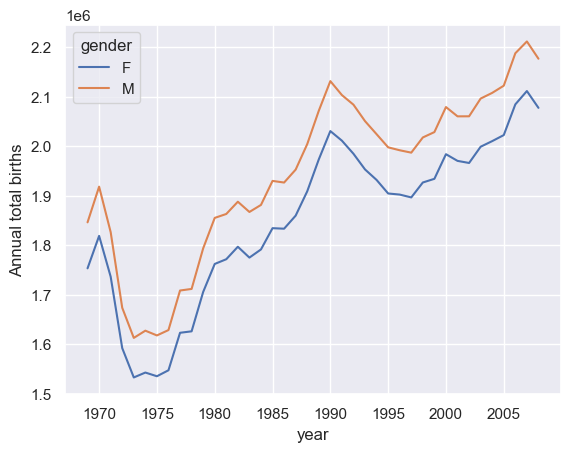

In [289]:

births.pivot_table("births",
                   index="year",
                   columns="gender",
                   aggfunc="sum").plot() # .plot ile grafik oluşturduk.
plt.ylabel("Annual total births")

# KATEGORİK VERİLER

In [290]:
data=pd.Series(["Tim","Tom","Sam","Sam"]*3)
data

0     Tim
1     Tom
2     Sam
3     Sam
4     Tim
5     Tom
6     Sam
7     Sam
8     Tim
9     Tom
10    Sam
11    Sam
dtype: object

In [291]:
pd.unique(data)

array(['Tim', 'Tom', 'Sam'], dtype=object)

In [292]:
pd.value_counts(data) # her değerden kaç tane var görebiliriz.  data.value_counts()'ta yapabilirdik.

Sam    6
Tim    3
Tom    3
dtype: int64

In [293]:
values=pd.Series([0,1,0,0]*3)
names=pd.Series(["Tim","Sam"])
names.take(values) # names.take(values) ile biz unique olarak sırası ile gelen değerleri eşleriz.  0 ile tim 1 ile sam eşlenir ve yeni seride ise böyle bir yapı kurulur.

0    Tim
1    Sam
0    Tim
0    Tim
0    Tim
1    Sam
0    Tim
0    Tim
0    Tim
1    Sam
0    Tim
0    Tim
dtype: object

## Categorical Type in Pandas

In [294]:
data

0     Tim
1     Tom
2     Sam
3     Sam
4     Tim
5     Tom
6     Sam
7     Sam
8     Tim
9     Tom
10    Sam
11    Sam
dtype: object

In [295]:
N=len(data)

In [296]:
df=pd.DataFrame(
    {"name":data,
     "num":np.arange(N),
     "score":np.random.randint(40,100, # size ile ne kadar değer üretilecek bunu belirleriz.
                               size=N),
     "weight":np.random.uniform(50,70,
                                size=N)},
    columns=["num","name","score","weight"]) # colon değerlerini gireriz. aslında belirlenen isimleri ile kolon sıralamasını değiştirdik.
df

,num,name,score,weight
0,0,Tim,89,66.092775
1,1,Tom,57,55.308967
2,2,Sam,52,57.576061
3,3,Sam,87,63.756994
4,4,Tim,68,58.328772
5,5,Tom,92,58.845413
6,6,Sam,91,59.704547
7,7,Sam,58,62.885216
8,8,Tim,59,69.809284
9,9,Tom,87,54.896903


In [297]:
df["name"]

0     Tim
1     Tom
2     Sam
3     Sam
4     Tim
5     Tom
6     Sam
7     Sam
8     Tim
9     Tom
10    Sam
11    Sam
Name: name, dtype: object

In [298]:
type(df["name"])

pandas.core.series.Series

In [299]:
name_cat=df["name"].astype("category") # isim sutunundaki veriler kategorik hale geldi.
name_cat

0     Tim
1     Tom
2     Sam
3     Sam
4     Tim
5     Tom
6     Sam
7     Sam
8     Tim
9     Tom
10    Sam
11    Sam
Name: name, dtype: category
Categories (3, object): ['Sam', 'Tim', 'Tom']

In [300]:
x=name_cat.values
print(x.categories)
print(x.codes)

Index(['Sam', 'Tim', 'Tom'], dtype='object')
[1 2 0 0 1 2 0 0 1 2 0 0]


In [301]:
df["name"]=df["name"].astype("category") # DataFramedeki sutunu kategoriye çevirebiliriz direkt olarak.
df.name

0     Tim
1     Tom
2     Sam
3     Sam
4     Tim
5     Tom
6     Sam
7     Sam
8     Tim
9     Tom
10    Sam
11    Sam
Name: name, dtype: category
Categories (3, object): ['Sam', 'Tim', 'Tom']

In [302]:
data_cat=pd.Categorical(list("abcde")) # direkt olarak kategorik bir değişken üretebiliriz.
data_cat

['a', 'b', 'c', 'd', 'e']
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [303]:

pd.Categorical(["banana", "apple", 
                "kiwi", "banana", "apple"])

['banana', 'apple', 'kiwi', 'banana', 'apple']
Categories (3, object): ['apple', 'banana', 'kiwi']

In [304]:
people=["baby", "child", "young", "old"]
codes=[0,1,2,3,1,0,0]
people_cat=pd.Categorical.from_codes(
    codes,people)
people_cat # verileri kategorik hale getirdik.

['baby', 'child', 'young', 'old', 'child', 'baby', 'baby']
Categories (4, object): ['baby', 'child', 'young', 'old']

In [305]:
people_cat=pd.Categorical.from_codes(  # elde olan verilerle kategorileme yaptık.
    codes,people,ordered=True) # ordered True ile sıralama sağladık sırası ile kategorilendi.
people_cat

['baby', 'child', 'young', 'old', 'child', 'baby', 'baby']
Categories (4, object): ['baby' < 'child' < 'young' < 'old']

In [306]:
people_cat.as_ordered() # veri kategorik sıralı hale geldi.

['baby', 'child', 'young', 'old', 'child', 'baby', 'baby']
Categories (4, object): ['baby' < 'child' < 'young' < 'old']

## Working with Categorical

In [307]:
data=np.random.randn(1000)
interval=pd.qcut(data,4)
interval

[(0.665, 2.913], (0.0298, 0.665], (0.665, 2.913], (-0.661, 0.0298], (-0.661, 0.0298], ..., (0.665, 2.913], (0.0298, 0.665], (-0.661, 0.0298], (0.665, 2.913], (0.0298, 0.665]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.8009999999999997, -0.661] < (-0.661, 0.0298] < (0.0298, 0.665] < (0.665, 2.913]]

In [308]:
type(interval)

pandas.core.arrays.categorical.Categorical

In [309]:
interval=pd.qcut(data,4,labels=["Q1","Q2",
                                "Q3","Q4"])
interval

['Q4', 'Q3', 'Q4', 'Q2', 'Q2', ..., 'Q4', 'Q3', 'Q2', 'Q4', 'Q3']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [310]:
interval=pd.Series(interval,name="quarter")

In [311]:
pd.Series(
    data).groupby(
    interval).agg(["count",
                   "min",
                   "max"]).reset_index()

,quarter,count,min,max
0,Q1,250,-2.800370,-0.661385
1,Q2,250,-0.661319,0.029517
2,Q3,250,0.030140,0.663514
3,Q4,250,0.670659,2.912780


## How is the performance of categorical types?

In [312]:
N=10000000
num=pd.Series(np.random.randn(N))
label=pd.Series(["a","b","c","d"]*(N//4))
cat=label.astype("category")
label.memory_usage()

80000132

In [313]:
cat.memory_usage() # bellekte ne kadar yer kaplar görebiliriz.  memory_usage() ile.    daha az bellek kullanıyor kategorik veriler.

10000336

## What are categorical methods?

In [314]:
s=pd.Series(["a","b","c","d"]*2)
s_ct=s.astype("category")
s_ct

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [315]:

s_ct.cat.codes # değerlere kod ataması yapılmış bunu görebiliriz.

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [316]:
s_ct.cat.categories #kategorileri görebiliriz.


Index(['a', 'b', 'c', 'd'], dtype='object')

In [317]:
new_ct=["a","b","c","d","e"]
s_ct.cat.set_categories(new_ct)  # ketegorrileri arttırmak istersek set_categories kullanırız. ve değişim olur kategorilerde.

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [318]:
s2_ct=s_ct[s_ct.isin(["a","b"])] # a ve b versa bunları getirecek.  True False gelecek olup olmamalarına bağlı olarak True ise verileri gelecek indexleri ile.
s2_ct            

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [319]:
s2_ct.cat.remove_unused_categories() # kullanılmayan kategorileri kaldırmak için kullanırız.  a ve b harici kategoriler kaldırıldı.

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

## How to create a dummy variable?

In [320]:
s_ct 

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [321]:
pd.get_dummies(s_ct) # get_dummies() kullanarak her satır ve sutun kullanılır her birine bir veri verilir. verinin her kategorisi farklı sutunlara dizilir. ve satırda eşlesen bir değerini alır.

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# METİNSEL İLE ÇALIŞMAK(WORKİNG WİTH TEXT)

In [322]:
"hello".upper()
data=["tim","Kate","SUSan",np.nan,"aLEX"]
# pandas'ta str metotlarını kullanmak için   df.str.func() yapısı ile kullanmak gerekir.

In [323]:
name=pd.Series(data)

In [324]:
name.str.capitalize() # hepsinin ilk harfini büyk hale getirdi.

0      Tim
1     Kate
2    Susan
3      NaN
4     Alex
dtype: object

In [325]:
name.str.lower()

0      tim
1     kate
2    susan
3      NaN
4     alex
dtype: object

In [326]:
name.str.len()

0    3.0
1    4.0
2    5.0
3    NaN
4    4.0
dtype: float64

In [327]:
name.str.startswith("a")

0    False
1    False
2    False
3      NaN
4     True
dtype: object

In [328]:
df.columns

Index(['num', 'name', 'score', 'weight'], dtype='object')

In [329]:
df.columns.str.lower().str.replace(" ","_") 

Index(['num', 'name', 'score', 'weight'], dtype='object')

In [330]:
s=pd.Series(["a_b_c","c_d_e",np.nan,"f_g_h"])
s

0    a_b_c
1    c_d_e
2      NaN
3    f_g_h
dtype: object

In [331]:
s.str.split("_").str[1] # 1. indexe sahip veriler geldi.

0      b
1      d
2    NaN
3      g
dtype: object

In [332]:
s.str.split("_",expand=True,n=1) # sadece bir değer için ayrılma yapılmış oldu.

,0,1
0,a,b_c
1,c,d_e
2,NaN,NaN
3,f,g_h


In [333]:
money=pd.Series(["15","-$20","30000"])
money

0       15
1     -$20
2    30000
dtype: object

In [334]:
money.str.replace("-\$","") # birden fazla değer olur -\$  şeklinde yapabiliriz.  \ kullanarak kaçış karakteri belirtiriz.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\2991130808.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  money.str.replace("-\$","") # birden fazla değer olur -\$  şeklinde yapabiliriz.  \ kullanarak kaçış karakteri belirtiriz.


0       15
1       20
2    30000
dtype: object

In [335]:
money.str.replace("-\$","-")

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3340069485.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  money.str.replace("-\$","-")


0       15
1      -20
2    30000
dtype: object

In [336]:
film=pd.read_csv("http://bit.ly/imdbratings")
film.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [337]:
film.title.str.upper()

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

In [338]:
film.columns=film.columns.str.capitalize()

In [339]:
film.head()

,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [340]:
film[film.Actors_list.str.contains(
    "Brad Pitt")]  # aktörlerden Brad Pitt'i içeren gelir.        

,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
106,8.3,Snatch.,R,Comedy,102,"[u'Jason Statham', u'Brad Pitt', u'Benicio Del..."
114,8.3,Inglourious Basterds,R,Adventure,153,"[u'Brad Pitt', u'Diane Kruger', u'Eli Roth']"
264,8.1,Twelve Monkeys,R,Mystery,129,"[u'Bruce Willis', u'Madeleine Stowe', u'Brad P..."
508,7.8,The Curious Case of Benjamin Button,PG-13,Drama,166,"[u'Brad Pitt', u'Cate Blanchett', u'Tilda Swin..."
577,7.8,Ocean's Eleven,PG-13,Crime,116,"[u'George Clooney', u'Brad Pitt', u'Julia Robe..."
683,7.7,Fury,R,Action,134,"[u'Brad Pitt', u'Shia LaBeouf', u'Logan Lerman']"
776,7.6,Moneyball,PG-13,Biography,133,"[u'Brad Pitt', u'Robin Wright', u'Jonah Hill']"
779,7.6,Interview with the Vampire: The Vampire Chroni...,R,Horror,123,"[u'Brad Pitt', u'Tom Cruise', u'Antonio Bander..."


In [341]:
film.Actors_list.str.replace("[","") 

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\3224643014.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  film.Actors_list.str.replace("[","")


0      u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']
1         u'Marlon Brando', u'Al Pacino', u'James Caan']
2      u'Al Pacino', u'Robert De Niro', u'Robert Duva...
3      u'Christian Bale', u'Heath Ledger', u'Aaron Ec...
4      u'John Travolta', u'Uma Thurman', u'Samuel L. ...
                             ...                        
974    u'Dustin Hoffman', u'Jessica Lange', u'Teri Ga...
975    u'Michael J. Fox', u'Christopher Lloyd', u'Mar...
976    u'Russell Crowe', u'Paul Bettany', u'Billy Boyd']
977    u'JoBeth Williams', u"Heather O'Rourke", u'Cra...
978    u'Charlie Sheen', u'Michael Douglas', u'Tamara...
Name: Actors_list, Length: 979, dtype: object

In [342]:
film.Actors_list.str.replace(
    "[","").str.replace("]","") #birden fazla değişim yapabiliriz.   str.replace() ile.

C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\2246477439.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  film.Actors_list.str.replace(
C:\Users\emrea\AppData\Local\Temp\ipykernel_38504\2246477439.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  "[","").str.replace("]","") #birden fazla değişim yapabiliriz.   str.replace() ile.


0       u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton'
1          u'Marlon Brando', u'Al Pacino', u'James Caan'
2      u'Al Pacino', u'Robert De Niro', u'Robert Duvall'
3      u'Christian Bale', u'Heath Ledger', u'Aaron Ec...
4      u'John Travolta', u'Uma Thurman', u'Samuel L. ...
                             ...                        
974    u'Dustin Hoffman', u'Jessica Lange', u'Teri Garr'
975    u'Michael J. Fox', u'Christopher Lloyd', u'Mar...
976     u'Russell Crowe', u'Paul Bettany', u'Billy Boyd'
977    u'JoBeth Williams', u"Heather O'Rourke", u'Cra...
978    u'Charlie Sheen', u'Michael Douglas', u'Tamara...
Name: Actors_list, Length: 979, dtype: object

# UYGULAMA

In [343]:
df=pd.read_csv(
    "ca_san_diego_2019_02_25.csv")
df.head() # önce veriyi okur ve ilk veriyi getiririz.

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Equipment Violation


In [344]:
df.tail(3) # sondan 3 adet veriyi alabiliriz.

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop
390996,390997,2017-03-31,23:49:00,620,23.0,hispanic,male,vehicular,False,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,Radio Call/Citizen Contact
390997,390998,2017-03-31,23:55:00,710,NaN,hispanic,male,vehicular,NaN,True,False,citation,NaN,NaN,NaN,NaN,NaN,NaN,Moving Violation
390998,390999,2017-03-31,23:58:00,310,26.0,white,female,vehicular,NaN,False,True,warning,NaN,NaN,NaN,NaN,NaN,NaN,Equipment Violation


In [345]:
df.shape # kaç adet satır kaç adet sutun olduğunu görebiliriz.

(390999, 19)

In [346]:
df.dtypes # sutunların veri tipini görebiliriz.

raw_row_number         int64
date                  object
time                  object
service_area          object
subject_age          float64
subject_race          object
subject_sex           object
type                  object
arrest_made           object
citation_issued       object
warning_issued        object
outcome               object
contraband_found      object
search_conducted      object
search_person         object
search_vehicle        object
search_basis          object
reason_for_search     object
reason_for_stop       object
dtype: object

In [347]:
df.isnull().sum() # her sutunda ne kadar NaN veri var görebiliriz.

raw_row_number            0
date                    132
time                   1256
service_area              0
subject_age           12644
subject_race           1398
subject_sex             806
type                      0
arrest_made           35022
citation_issued       32712
warning_issued        32712
outcome               40047
contraband_found     379835
search_conducted      37096
search_person        376459
search_vehicle       376459
search_basis         374173
reason_for_search    376343
reason_for_stop         266
dtype: int64

In [348]:
df.date.head() # sutunun ilk 5 elemanını görebiliriz.

0    2014-01-01
1    2014-01-01
2    2014-01-01
3    2014-01-01
4    2014-01-01
Name: date, dtype: object

In [349]:
df.columns # tüm kolonları görebiliriz.

Index(['raw_row_number', 'date', 'time', 'service_area', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis', 'reason_for_search',
       'reason_for_stop'],
      dtype='object')

In [350]:
df["time"].head()

0    01:25:00
1    05:47:00
2    07:46:00
3    08:10:00
4    08:35:00
Name: time, dtype: object

In [351]:
df[["date","time"]].head() # aynı satırda olan değerleri sadece tarih ve zamanı alacağız ilk 5 satır gelecek.

,date,time
0,2014-01-01,01:25:00
1,2014-01-01,05:47:00
2,2014-01-01,07:46:00
3,2014-01-01,08:10:00
4,2014-01-01,08:35:00


In [352]:
df.rename(columns={"date":"DATE",
                   "time":"TIME"},
          inplace=True) # kalıcı bir değişim.  rename() ile değişim olacak içine bir dict verirsek eğer o zaman key'ler karşılık gelen value değerine dönüşür.
df.head()

,raw_row_number,DATE,TIME,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Equipment Violation


In [353]:
df.iloc[0].head() # ilk satırı alırız.   head ile ilk 5 sutunu aldık çünkü bu bir seri oldu tek bir satırı aldığımığız için.

raw_row_number             1
DATE              2014-01-01
TIME                01:25:00
service_area             110
subject_age             24.0
Name: 0, dtype: object

In [354]:
df.iloc[0,1] #   ilk satırın 2. sutununun değerini aldık.

'2014-01-01'

In [355]:
df.iloc[0,[1,3,5]] # ilk satırın 2. 4. ve 6. sutunundaki değerleri gördük.

DATE            2014-01-01
service_area           110
subject_race         white
Name: 0, dtype: object

In [356]:
df.iloc[0:5,[1,3,5]] # ilk 5 satır ve 2 4 6. sutunları aldık. 

,DATE,service_area,subject_race
0,2014-01-01,110,white
1,2014-01-01,320,white
2,2014-01-01,320,asian/pacific islander
3,2014-01-01,610,white
4,2014-01-01,930,hispanic


In [357]:
df.iloc[0:5,0:5] # ilk 5 satır ve ilk 5 sutununu ele alırız.  

,raw_row_number,DATE,TIME,service_area,subject_age
0,1,2014-01-01,01:25:00,110,24.0
1,2,2014-01-01,05:47:00,320,42.0
2,3,2014-01-01,07:46:00,320,29.0
3,4,2014-01-01,08:10:00,610,23.0
4,5,2014-01-01,08:35:00,930,35.0


In [358]:
df.loc[1:5,"TIME":"type"] # zamandan tipe kadar onlar dahil.

,TIME,service_area,subject_age,subject_race,subject_sex,type
1,05:47:00,320,42.0,white,male,vehicular
2,07:46:00,320,29.0,asian/pacific islander,male,vehicular
3,08:10:00,610,23.0,white,male,vehicular
4,08:35:00,930,35.0,hispanic,male,vehicular
5,08:39:00,820,30.0,hispanic,male,vehicular


In [359]:
df.loc[0:5,"DATE":"type"].head()

,DATE,TIME,service_area,subject_age,subject_race,subject_sex,type
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular


In [360]:
df.shape

(390999, 19)

In [361]:
df.dropna(axis="columns",how="all").shape # tum değerleri eksik olan sutunlar düşecek.

(390999, 19)

In [362]:
df.dropna(axis="columns",how="any").shape #  hiç boşu olmayan sutunlar kalacak elde.

(390999, 3)

## A SİMPLE ANALYSİS

In [363]:
df.reason_for_stop.value_counts().head()  # en çok neden durdulmuş arabalar bunu görebiliriz.

Moving Violation                285562
Equipment Violation              99577
Radio Call/Citizen Contact        1941
Muni, County, H&S Code            1349
Personal Knowledge/Informant       884
Name: reason_for_stop, dtype: int64

In [364]:
df[df.reason_for_stop==
   "Moving Violation"
  ].subject_sex.value_counts(normalize=True) * 100 # hız ihlali yapanların cinsiyet yüzdesini görebiliriz.

male      62.890385
female    37.109615
Name: subject_sex, dtype: float64

In [365]:
df[df.reason_for_stop==
   "Moving Violation"
  ].subject_sex.value_counts(
    normalize=True) # normalize ile yüzdeleme yaparız  100 ile çarparsak yüzde üzerinden görebiliriz. default olarak 1 üzerinden gösteriyor.

male      0.628904
female    0.371096
Name: subject_sex, dtype: float64

In [366]:
df[df.subject_sex==
   "female"
  ].reason_for_stop.value_counts(
    normalize=True).head() # kadınların neden durdurulduğunu görebiliriz.

Moving Violation                0.773651
Equipment Violation             0.215736
Radio Call/Citizen Contact      0.003606
Muni, County, H&S Code          0.002516
Personal Knowledge/Informant    0.001609
Name: reason_for_stop, dtype: float64

In [367]:
df.groupby(
    "subject_sex"
).reason_for_stop.value_counts(
    normalize=True).head()

subject_sex  reason_for_stop             
female       Moving Violation                0.773651
             Equipment Violation             0.215736
             Radio Call/Citizen Contact      0.003606
             Muni, County, H&S Code          0.002516
             Personal Knowledge/Informant    0.001609
Name: reason_for_stop, dtype: float64

In [368]:
df.groupby(
    "subject_sex"
).reason_for_stop.value_counts(
    normalize=True).unstack()

reason_for_stop,&Equipment Violation,&Moving Violation,&Radio Call/Citizen Contact,B & P,Equipment Violation,"MUNI, County, H&S Code",Moving Violation,"Muni, County, H&S Code",NOT CHECKED,NOT MARKED,...,Radio Call/Citizen Contact,Suspect Info,"Suspect Info (I.S., Bulletin, Log)","UNI, &County, H&&S Code",none listed,not listed,not marked,not marked not marked,not noted,not secified
subject_sex,,,,,,,,,,,,,,,,,,,,,
female,0.000015,0.000044,NaN,0.000007,0.215736,0.000029,0.773651,0.002516,0.000007,0.000015,...,0.003606,0.000044,0.000929,0.000110,0.000007,NaN,0.000015,0.000007,NaN,0.000007
male,0.000004,0.000059,0.000004,NaN,0.276510,0.000099,0.707770,0.003961,NaN,NaN,...,0.005690,0.000043,0.001619,0.000229,0.000016,0.000004,0.000008,NaN,0.000008,NaN


In [369]:
df.arrest_made.value_counts()

False    351060
True       4917
Name: arrest_made, dtype: int64

In [370]:
df.arrest_made.value_counts(normalize=True)

False    0.986187
True     0.013813
Name: arrest_made, dtype: float64

In [371]:
df.groupby(
    "subject_sex"
).arrest_made.value_counts(normalize=True)

subject_sex  arrest_made
female       False          0.991049
             True           0.008951
male         False          0.983550
             True           0.016450
Name: arrest_made, dtype: float64

In [372]:
df.groupby(
    ["subject_race","subject_sex"]
).arrest_made.value_counts(
    normalize=True).head()

subject_race            subject_sex  arrest_made
asian/pacific islander  female       False          0.993134
                                     True           0.006866
                        male         False          0.987704
                                     True           0.012296
black                   female       False          0.985657
Name: arrest_made, dtype: float64

In [373]:
df.DATE.str.slice(0,4).value_counts() # burada slice ile bölme yaparız.  ilk 0 karakteri alırız. 

2014    144164
2015    115422
2016    103051
2017     28230
Name: DATE, dtype: int64

In [374]:
combined=df.DATE.str.cat(df.TIME, sep=" ") # boşluğa göre böldük. sep ile. 
df["stop_datetime"]=pd.to_datetime(combined) # datetime'ye çevirme işlemi yaptık.
df.head() # date verileri datetime olarak saklanmaya başladılar. bu sayede.

,raw_row_number,DATE,TIME,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,stop_datetime
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 01:25:00
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 05:47:00
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 07:46:00
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 08:10:00
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Equipment Violation,2014-01-01 08:35:00


In [375]:
df.dtypes

raw_row_number                int64
DATE                         object
TIME                         object
service_area                 object
subject_age                 float64
subject_race                 object
subject_sex                  object
type                         object
arrest_made                  object
citation_issued              object
warning_issued               object
outcome                      object
contraband_found             object
search_conducted             object
search_person                object
search_vehicle               object
search_basis                 object
reason_for_search            object
reason_for_stop              object
stop_datetime        datetime64[ns]
dtype: object

In [376]:
df.stop_datetime.dt.month.head() # month ile ayları year ile yılları vs görebiliriz.

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: stop_datetime, dtype: float64

In [377]:
df.arrest_made.head() 

0    False
1    False
2    False
3    False
4    False
Name: arrest_made, dtype: object

In [378]:
df["arrest_made"]=df.arrest_made.astype(bool) # obje olan veri tipini bool hale getirdik astype ile.
df.arrest_made.value_counts()

False    351060
True      39939
Name: arrest_made, dtype: int64

In [379]:
df.arrest_made.mean()

0.10214604129422326

In [380]:
df.groupby(
    df.stop_datetime.dt.hour
).arrest_made.mean().head() # saatlere göre ortlama durdurma oranları.

stop_datetime
0.0    0.113073
1.0    0.140684
2.0    0.141698
3.0    0.127541
4.0    0.105165
Name: arrest_made, dtype: float64

<Axes: xlabel='stop_datetime'>

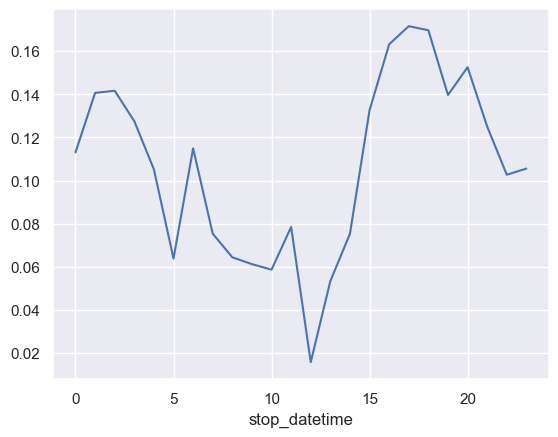

In [381]:
%matplotlib inline

df.groupby(
    df.stop_datetime.dt.hour
).arrest_made.mean().plot() # saaatlere göre durdurmayı grafik ile gördük. 15 ile 20 arası tutuklama fazla görüldüğü gibi.

In [382]:
df.stop_datetime.dt.hour.value_counts().head() 

10.0    30590
9.0     29751
8.0     27865
15.0    24598
0.0     22481
Name: stop_datetime, dtype: int64

In [383]:
df.stop_datetime.dt.hour.value_counts().sort_index().head()

0.0    22481
1.0     8544
2.0     5914
3.0     3591
4.0     3214
Name: stop_datetime, dtype: int64

<Axes: >

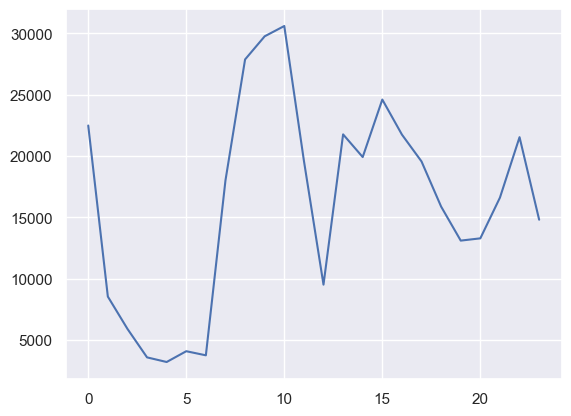

In [384]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()  

# ÇOKLU SEÇME VE FİLTRELEME İŞLEMLERİ

In [385]:
film=pd.read_csv("http://bit.ly/imdbratings")
film.head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


## Practical column selection

In [386]:
film["title"].head() 

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [387]:
film[["title","genre"]].head() # ilk 5 film'in başlığı ve türünü görebiliriz.

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## loc method


In [388]:
film.loc[0,] 

star_rating                                                     9.3
title                                      The Shawshank Redemption
content_rating                                                    R
genre                                                         Crime
duration                                                        142
actors_list       [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
Name: 0, dtype: object

In [389]:
film.loc[[0,2,4],]  # 1. 3 .5. film geldi ele.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [390]:
film.loc[0:2,] 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [391]:
film.loc[0:5,"title"]

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
5                12 Angry Men
Name: title, dtype: object

In [392]:
film.loc[0:5,"title":"genre"]  # 5 değeride dahil. loc kullandığımız için

,title,content_rating,genre
0,The Shawshank Redemption,R,Crime
1,The Godfather,R,Crime
2,The Godfather: Part II,R,Crime
3,The Dark Knight,PG-13,Action
4,Pulp Fiction,R,Crime
5,12 Angry Men,NOT RATED,Drama


In [393]:
film.loc[0:5,"title":"duration"]

,title,content_rating,genre,duration
0,The Shawshank Redemption,R,Crime,142
1,The Godfather,R,Crime,175
2,The Godfather: Part II,R,Crime,200
3,The Dark Knight,PG-13,Action,152
4,Pulp Fiction,R,Crime,154
5,12 Angry Men,NOT RATED,Drama,96


In [394]:
film.loc[:,"title":"genre"].head() # sadece sutunları dilimledik. tüm satırları ele aldık.

,title,content_rating,genre
0,The Shawshank Redemption,R,Crime
1,The Godfather,R,Crime
2,The Godfather: Part II,R,Crime
3,The Dark Knight,PG-13,Action
4,Pulp Fiction,R,Crime


In [395]:
film.loc[film.genre=="Crime",].head(3)  # sadece tipi Crime olanları alırız.  sonra ilk üç değeri alırız.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [396]:

film.loc[film.genre=="Crime",[
    "title","duration"]] # tipi Crime olanların title ve duration bilgilerini aldık.

,title,duration
0,The Shawshank Redemption,142
1,The Godfather,175
2,The Godfather: Part II,200
4,Pulp Fiction,154
21,City of God,130
...,...,...
927,Brick,110
931,Mean Streets,112
950,Bound,108
969,Law Abiding Citizen,109


In [397]:
film.loc[
    film.genre=="Crime","title":"duration"]

,title,content_rating,genre,duration
0,The Shawshank Redemption,R,Crime,142
1,The Godfather,R,Crime,175
2,The Godfather: Part II,R,Crime,200
4,Pulp Fiction,R,Crime,154
21,City of God,R,Crime,130
...,...,...,...,...
927,Brick,R,Crime,110
931,Mean Streets,R,Crime,112
950,Bound,R,Crime,108
969,Law Abiding Citizen,R,Crime,109


## iloc method


In [398]:
film.iloc[:,0].head() # iloc ile index kullanarak işlem yaparız.

0    9.3
1    9.2
2    9.1
3    9.0
4    8.9
Name: star_rating, dtype: float64

In [399]:
film.columns 

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [400]:
film.iloc[:,[0,3]].head() # tüm satırlar ve 1. sutun ile 4. sutunu ele alırız.

,star_rating,genre
0,9.3,Crime
1,9.2,Crime
2,9.1,Crime
3,9.0,Action
4,8.9,Crime


In [401]:
film.iloc[:,0:3].head() # 0 1 2 indexli sutunlar ve tum satırlar ele alındı.

,star_rating,title,content_rating
0,9.3,The Shawshank Redemption,R
1,9.2,The Godfather,R
2,9.1,The Godfather: Part II,R
3,9.0,The Dark Knight,PG-13
4,8.9,Pulp Fiction,R


In [402]:
film.iloc[0,0:3]

star_rating                            9.3
title             The Shawshank Redemption
content_rating                           R
Name: 0, dtype: object

In [403]:
film.iloc[0:5,0:3] # 0 1 2 3 4 indexli satırlar ve 0 1 2 indexli sutunlar ele alındı.

,star_rating,title,content_rating
0,9.3,The Shawshank Redemption,R
1,9.2,The Godfather,R
2,9.1,The Godfather: Part II,R
3,9.0,The Dark Knight,PG-13
4,8.9,Pulp Fiction,R


In [404]:
film.iloc[0:5,].head(3) 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [405]:
film.iloc[0:5,:].head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


## Multiple filtering

In [406]:
film.loc[film.duration>=200,].head(3) # duration'u 200'den fazla olan filmleri alabiliriz. o satırları getirir bize.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."


In [407]:
film.loc[film.duration>=200,"title"].head() # durationu 200 veya daha fazla olanların title'sini getirdi.

2                            The Godfather: Part II
7     The Lord of the Rings: The Return of the King
17                                    Seven Samurai
78                      Once Upon a Time in America
85                               Lawrence of Arabia
Name: title, dtype: object

In [408]:
film[(
    film.duration>=200)|(
    film.genre=="Crime")|(
    film.genre=="Action")].head(3) # tipi Crime olan veya tipi Action olan veya uzunluğu 200'e eşit veya daha fazla olan filmleri alabiliriz. sonra ilk 3 değerini gördük...   | veya demek  & ve demek.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [409]:
film[film.genre.isin([
    "Crime","Drama","Action"])]  # isin ile içinde olan değerlere True verecek değilse False verecek.   Genre'si isin'de True olan satırlar gelecek bize.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


# VERİ GÖRSELLEŞTİRME WİTH PANDAS

In [410]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # stil belirleme yaptık.

## Plotting graph with plot() method

<Axes: >

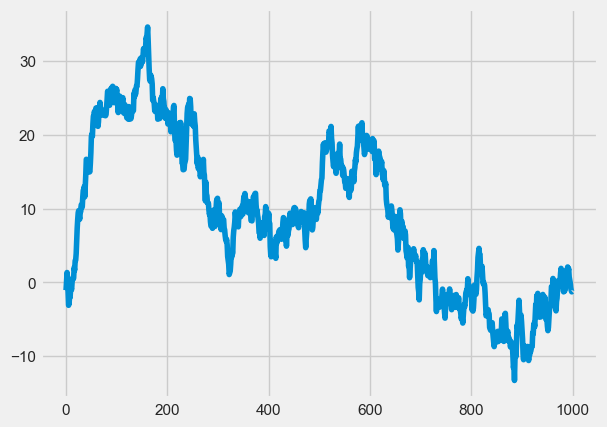

In [411]:
data=pd.Series(np.random.randn(1000).cumsum())
data.plot() # df.plot kullanabiliriz.

<Axes: >

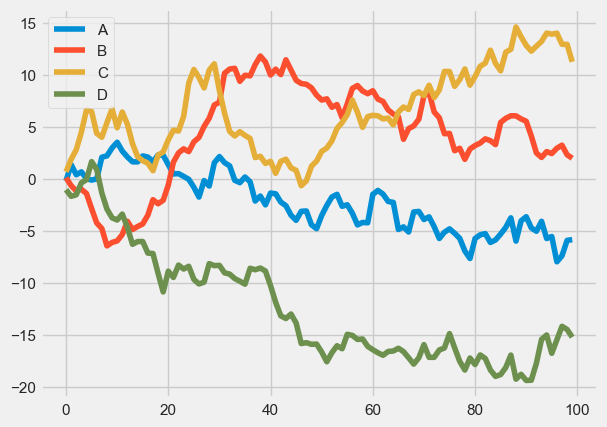

In [412]:
df1 = pd.DataFrame(np.random.randn(100, 4),columns=list('ABCD'))
df1 = df1.cumsum() # toplanarak gitmesi için kümülatif toplama yaparız sırası ile toplanarak gider.
df1.plot()

## Bar Charts

<Axes: >

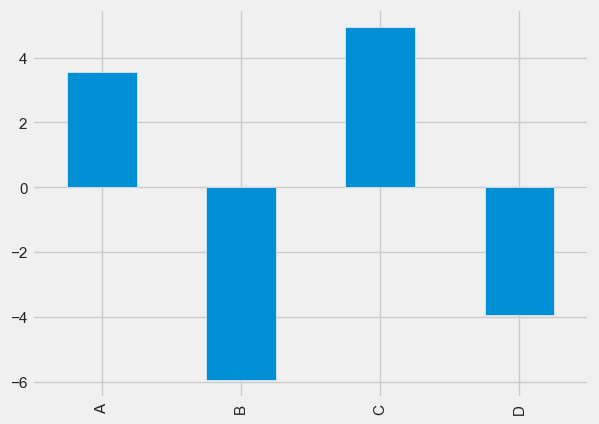

In [413]:
df1.iloc[10].plot(kind='bar')

<Axes: >

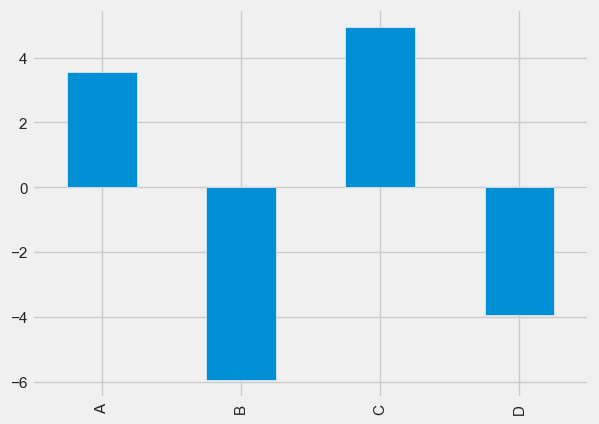

In [414]:
df1.iloc[10].plot.bar()

<Axes: >

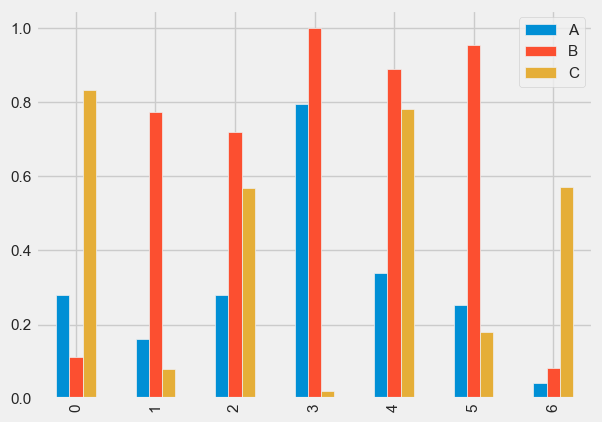

In [415]:
df2=pd.DataFrame(np.random.rand(7,3), columns=list("ABC"))
df2.plot.bar() # df.plot.bar() ile her sutunun değerlerinin sayılarını görebildik.

<Axes: >

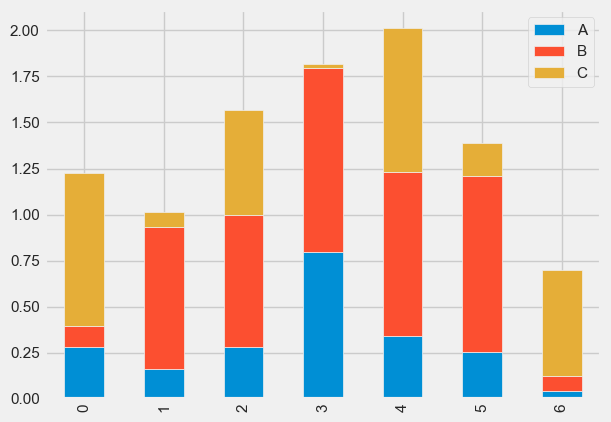

In [416]:
df2.plot.bar(stacked=True) # üst üste koyuldular.

<Axes: >

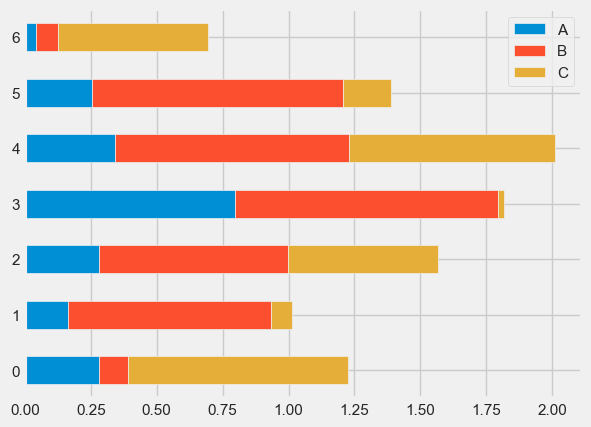

In [417]:
df2.plot.barh(stacked=True) #bar hortizonal ile yan yatırırız.

## Histograms

In [418]:
iris=pd.read_csv("iris.data", header=None)
iris.columns=["sepal_length","sepal_width", "petal_length", 
              "petal_width", "species"]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: ylabel='Frequency'>

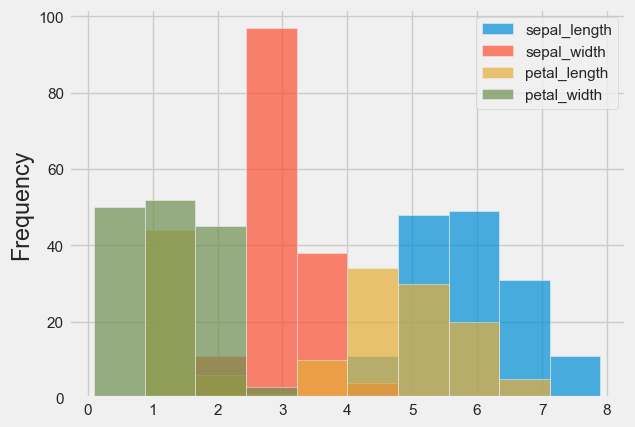

In [419]:
iris.plot.hist(alpha=0.7) # alpha ile saydamlık belirleriz.

<Axes: ylabel='Frequency'>

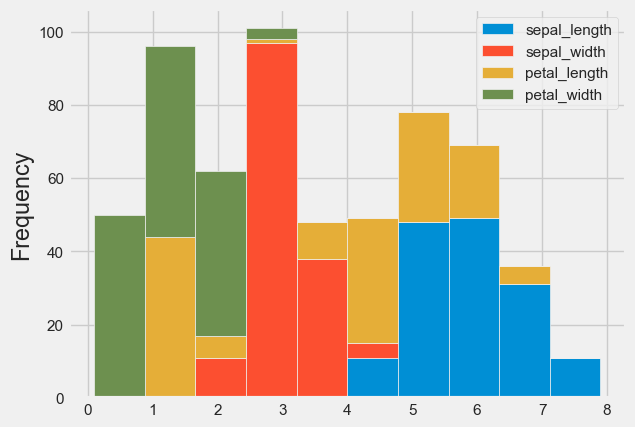

In [420]:
iris.plot.hist(alpha=1, stacked=True) # sıralı şekilde üst üst koyar. stacked = True ile yaparız bunu.

<Axes: ylabel='Frequency'>

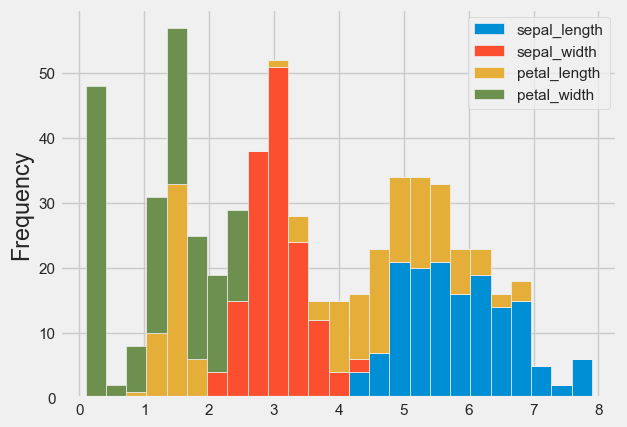

In [421]:
bins=25
iris.plot.hist(alpha=1, stacked=True, bins=25) # bins ile aralık belirleriz.

<Axes: xlabel='Frequency'>

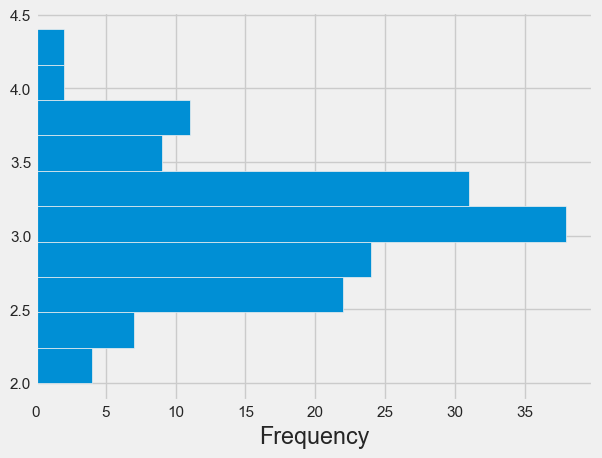

In [422]:
iris["sepal_width"].plot.hist(orientation="horizontal")

<Axes: >

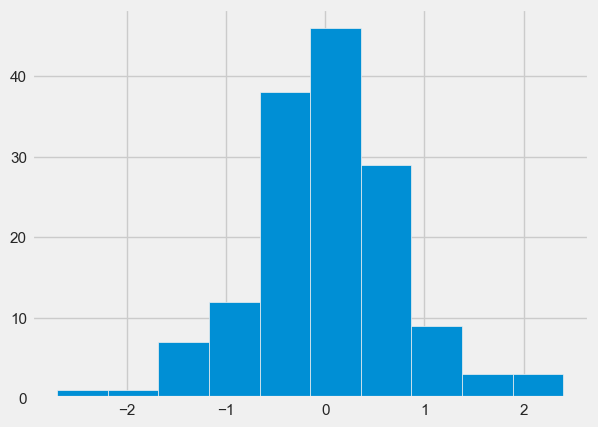

In [423]:
iris["sepal_length"].diff().hist()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

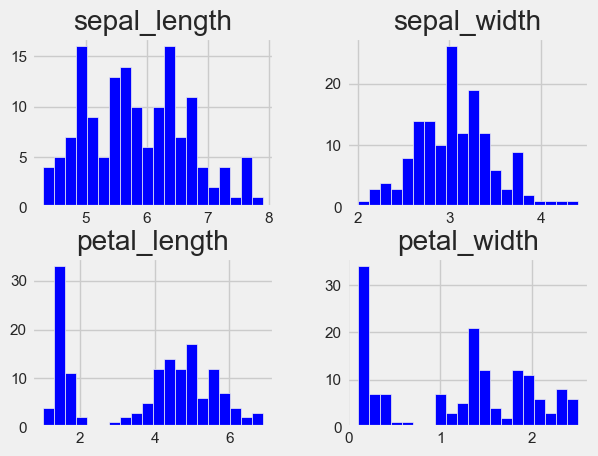

In [424]:
iris.hist(color="blue", alpha=1, bins=20)

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

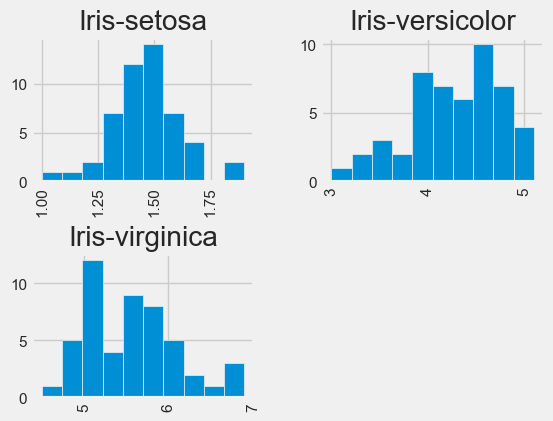

In [425]:
iris.hist("petal_length",by="species")

## Boxplot charts

<Axes: >

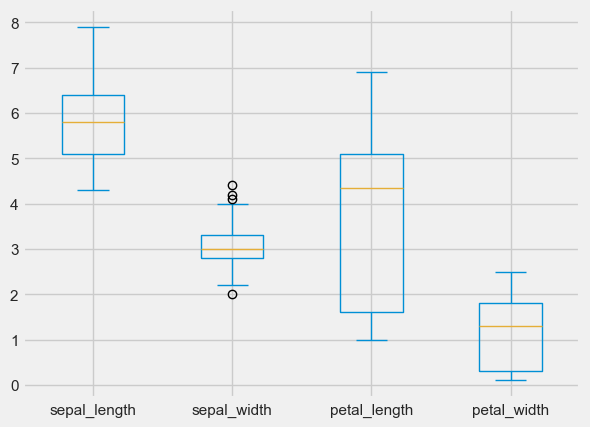

In [426]:
iris.plot.box() 

<Axes: >

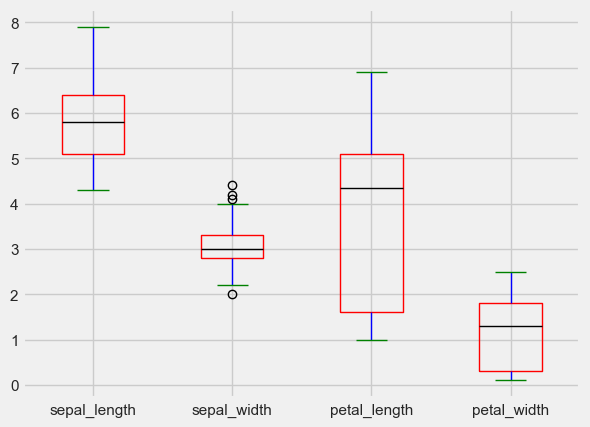

In [427]:
colors={'boxes': 'Red', 'whiskers': 'blue','medians': 'Black', 'caps': 'Green'}
iris.plot.box(color=colors)

<Axes: >

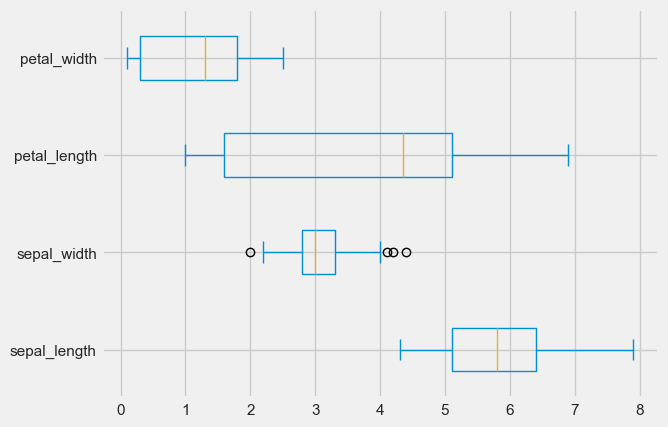

In [428]:
iris.plot.box(vert=False)

<Axes: >

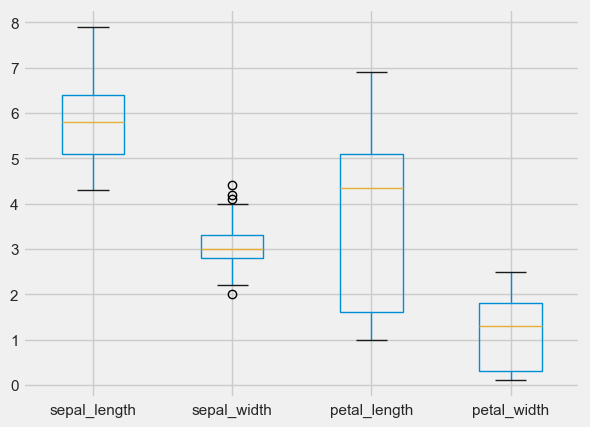

In [429]:
iris.boxplot()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

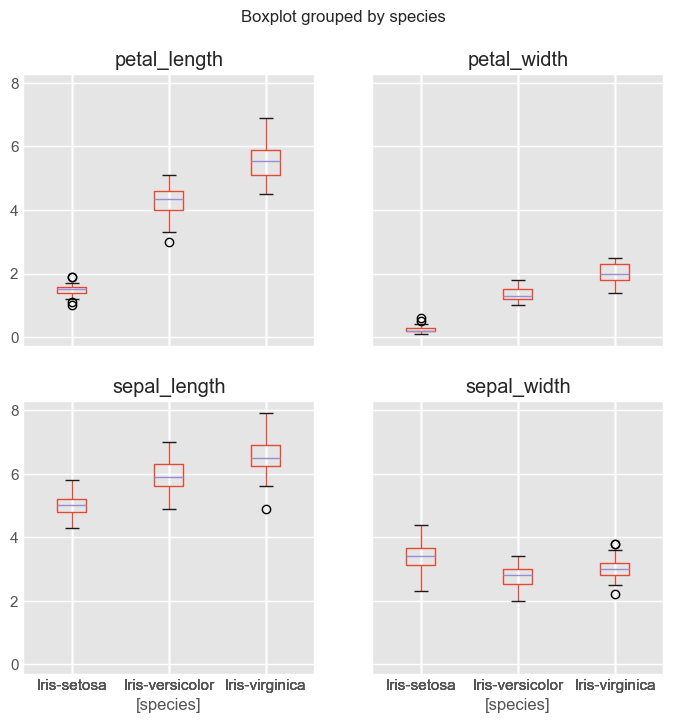

In [430]:
plt.rcParams["figure.figsize"]=(8,8)
plt.style.use("ggplot")
iris.boxplot(by='species')

In [431]:
plt.style.use("fivethirtyeight")


## Area Charts

In [432]:
df = pd.DataFrame(np.random.rand(10, 4), columns=list("ABCD"))
df.head()

,A,B,C,D
0,0.620483,0.225281,0.338717,0.226752
1,0.680538,0.003225,0.575934,0.701954
2,0.191589,0.773489,0.515483,0.453786
3,0.216704,0.650022,0.416355,0.089667
4,0.127549,0.055888,0.284732,0.565265


<Axes: >

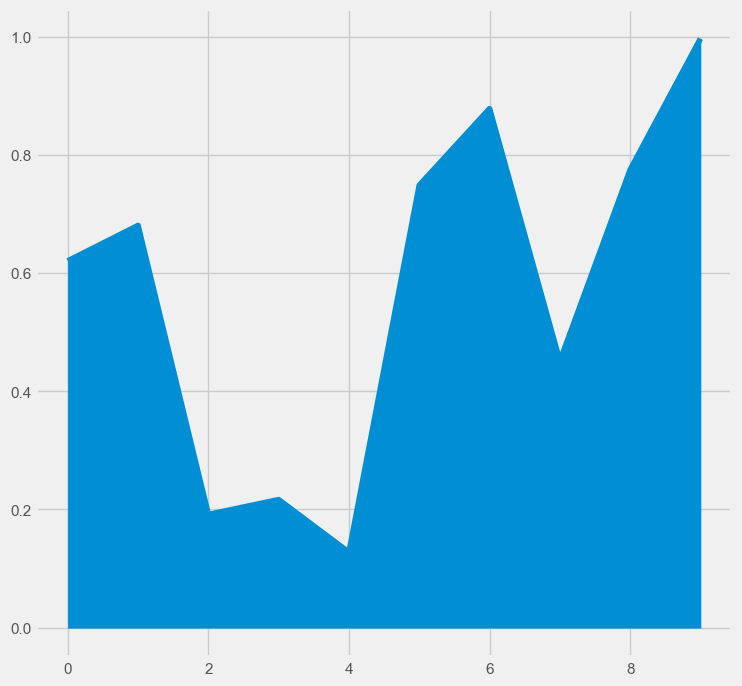

In [433]:
df["A"].plot.area()

<Axes: >

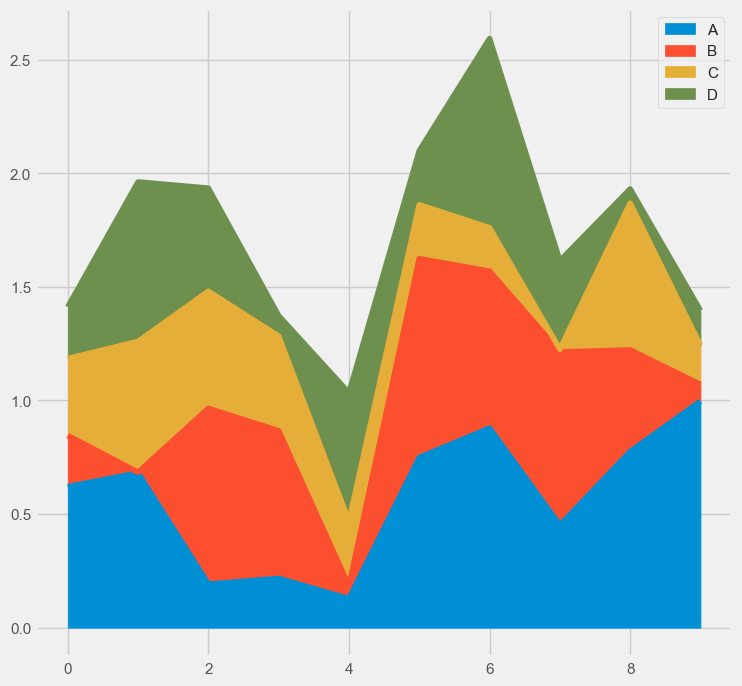

In [434]:
df.plot.area()

<Axes: >

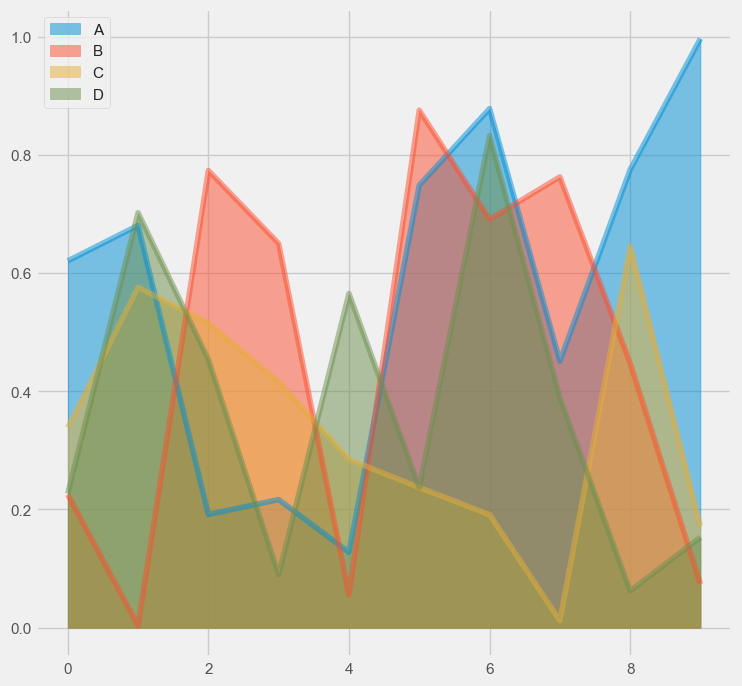

In [435]:
df.plot.area(stacked=False)

In [436]:
iris=pd.read_csv("iris.data", header=None)
iris.columns=["sepal_length","sepal_width", "petal_length", 
              "petal_width", "species"]

In [437]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<Axes: >

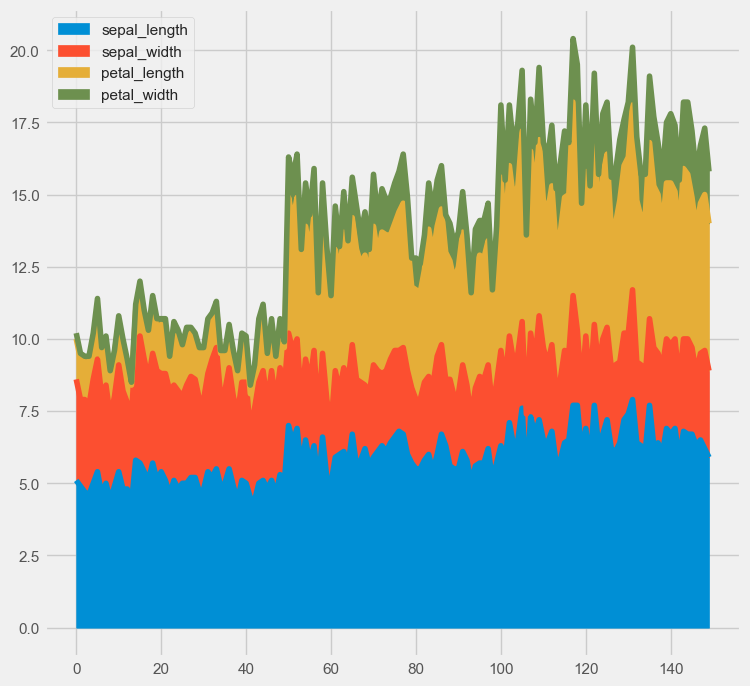

In [438]:
iris.plot.area()

<Axes: >

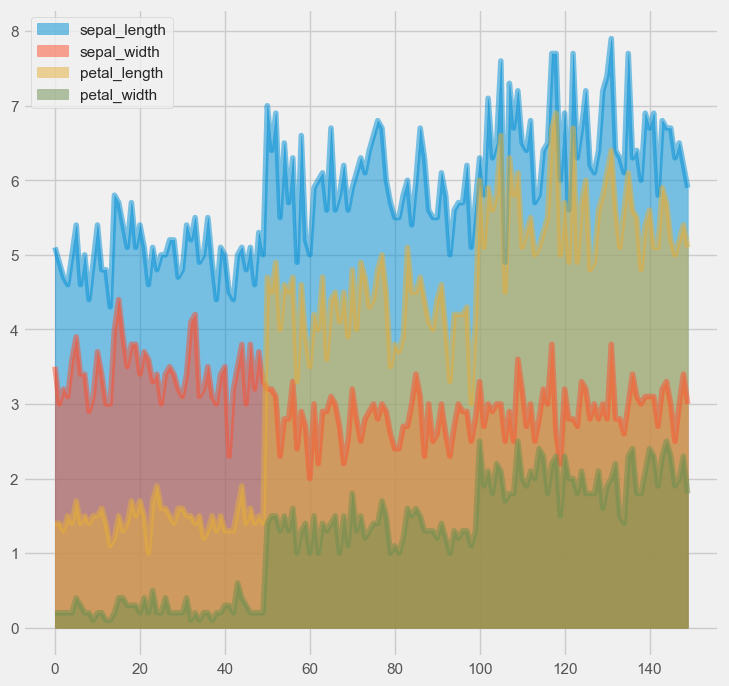

In [439]:
iris.plot.area(stacked=False)

## Scatter Plots


<Axes: xlabel='A', ylabel='B'>

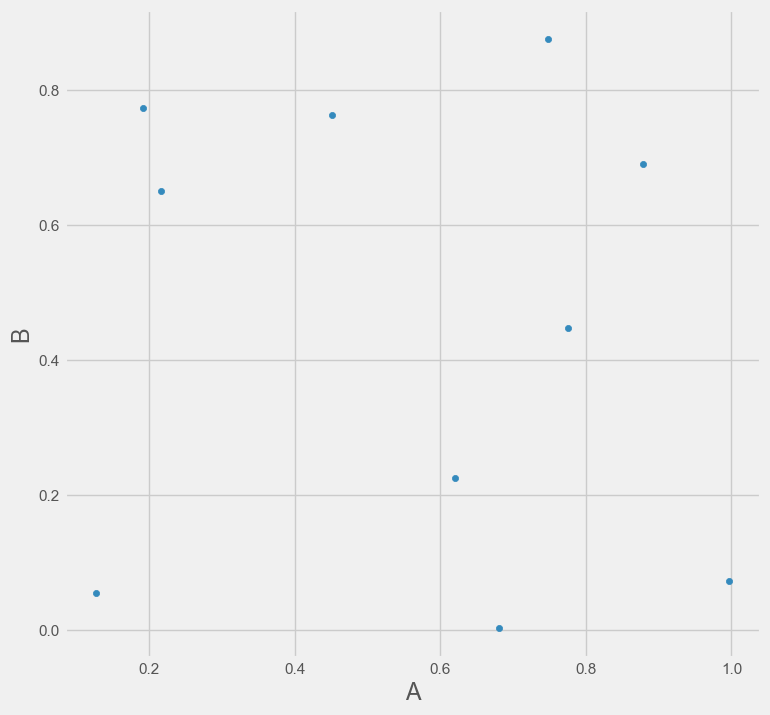

In [440]:
df.plot.scatter(x='A', y='B')

In [441]:
movies=pd.read_csv("imdbratings.txt")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [442]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

<Axes: xlabel='star_rating', ylabel='duration'>

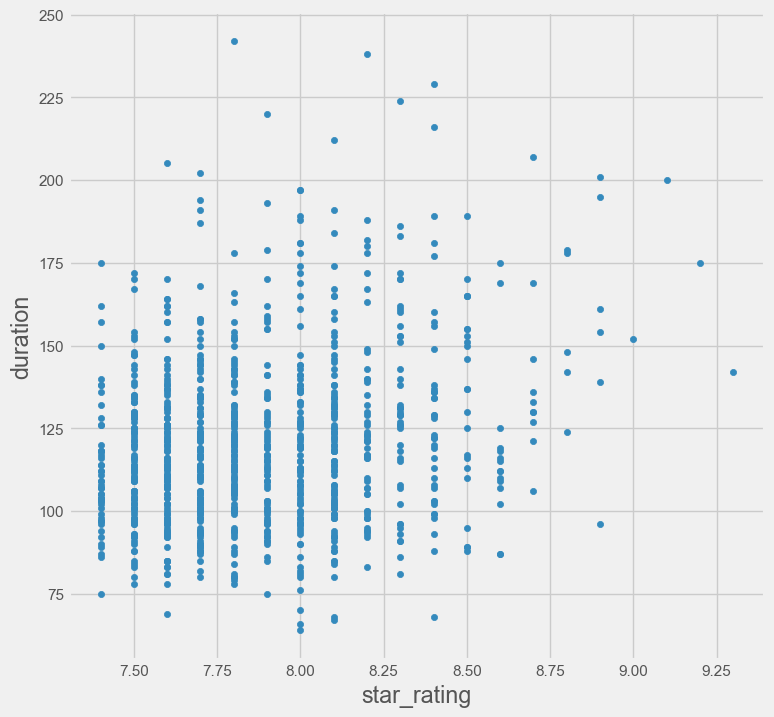

In [443]:
movies.plot.scatter(x='star_rating', y='duration')

<Axes: xlabel='petal_length', ylabel='petal_width'>

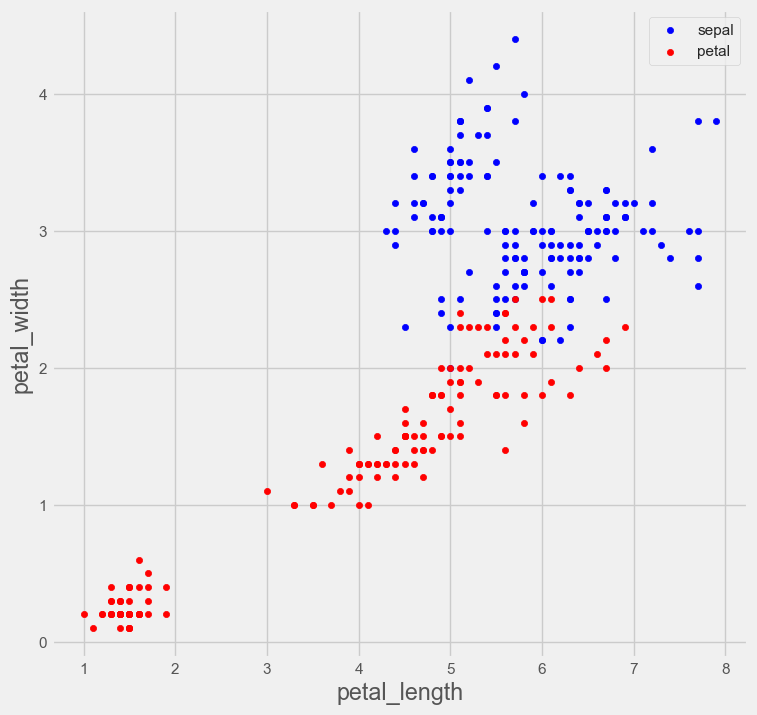

In [444]:
ax=iris.plot.scatter(x='sepal_length', y='sepal_width', 
                     color='Blue', label='sepal')
iris.plot.scatter(x='petal_length', y='petal_width', color='red', 
                  label='petal', ax=ax)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

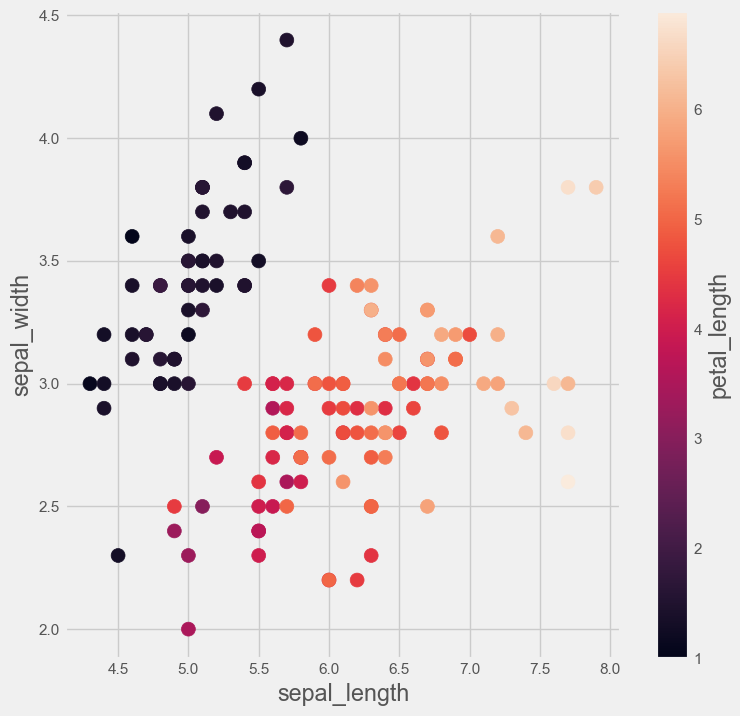

In [445]:
iris.plot.scatter(x='sepal_length', y='sepal_width', 
                  c='petal_length', s=100)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

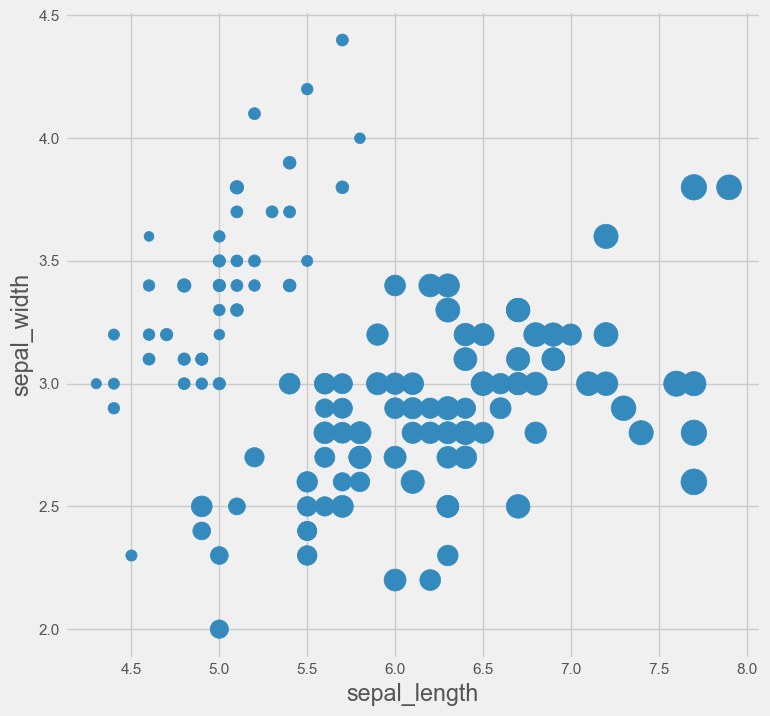

In [446]:
iris.plot.scatter(x='sepal_length', y='sepal_width', 
                  s=iris['petal_length'] * 50)

## Hexagonal bin charts

<Axes: xlabel='star_rating', ylabel='duration'>

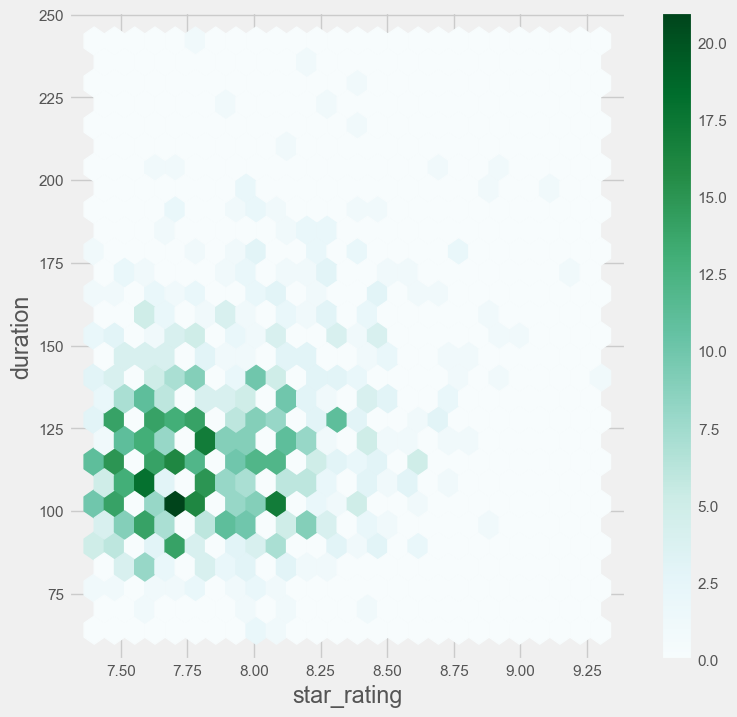

In [447]:
movies.plot.hexbin(x="star_rating", y="duration", gridsize=25)

<Axes: xlabel='star_rating', ylabel='duration'>

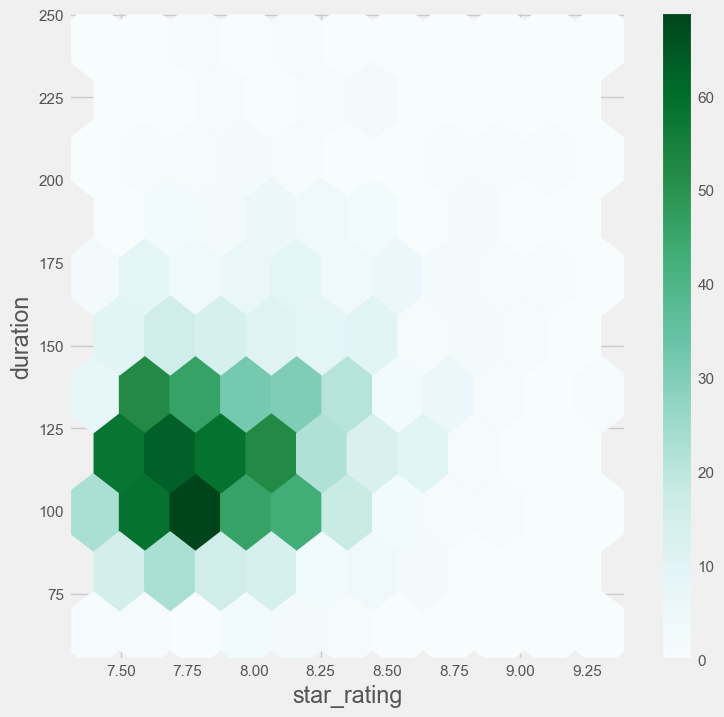

In [448]:
movies.plot.hexbin(x="star_rating", y="duration", gridsize=10)

## Pie Charts

In [449]:
iris_avg=iris["petal_width"].groupby(iris["species"]).mean()
iris_avg

species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: petal_width, dtype: float64

<Axes: ylabel='petal_width'>

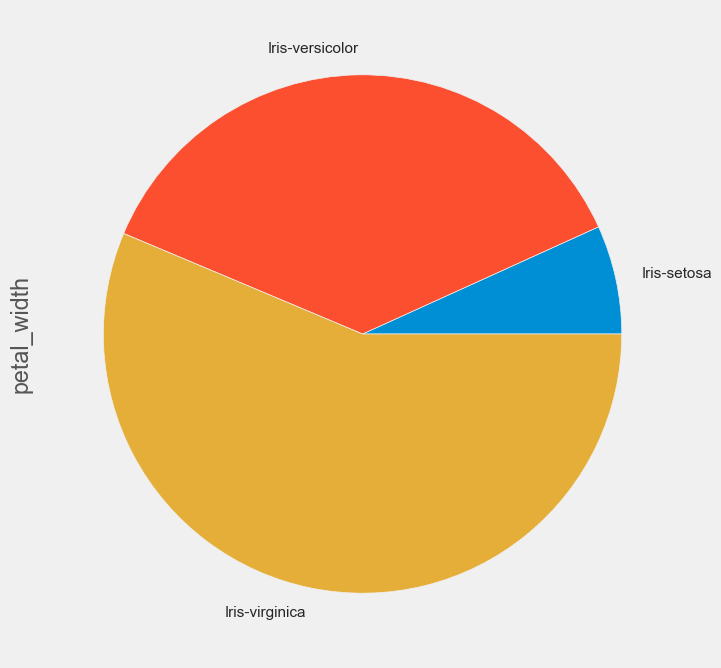

In [450]:
iris_avg.plot.pie()

array([<Axes: ylabel='petal_width'>, <Axes: ylabel='petal_length'>],
      dtype=object)

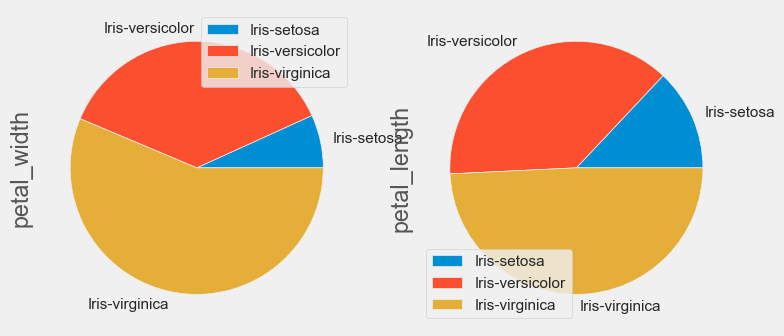

In [451]:
iris_avg_2=iris[["petal_width", 
                 "petal_length"]].groupby(iris["species"]).mean()
iris_avg_2.plot.pie(subplots=True)

<Axes: ylabel='petal_width'>

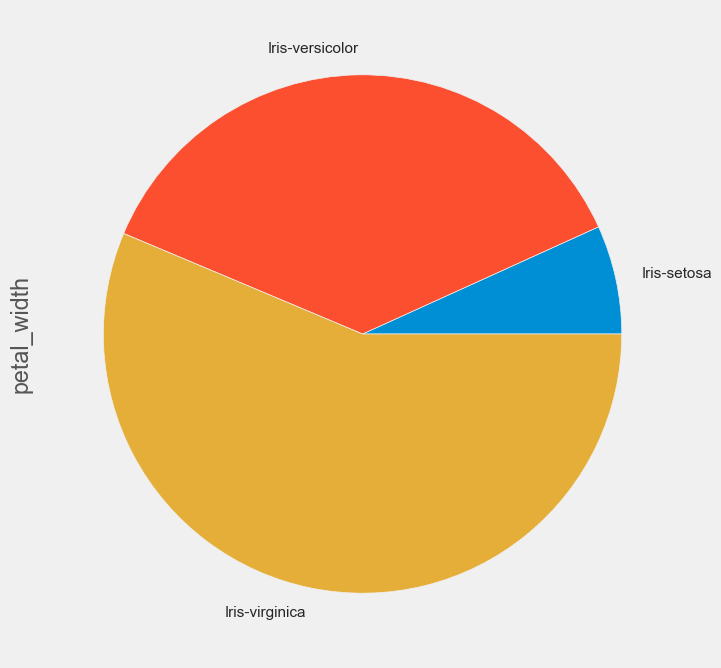

In [452]:
iris_avg.plot.pie()

<Axes: ylabel='petal_width'>

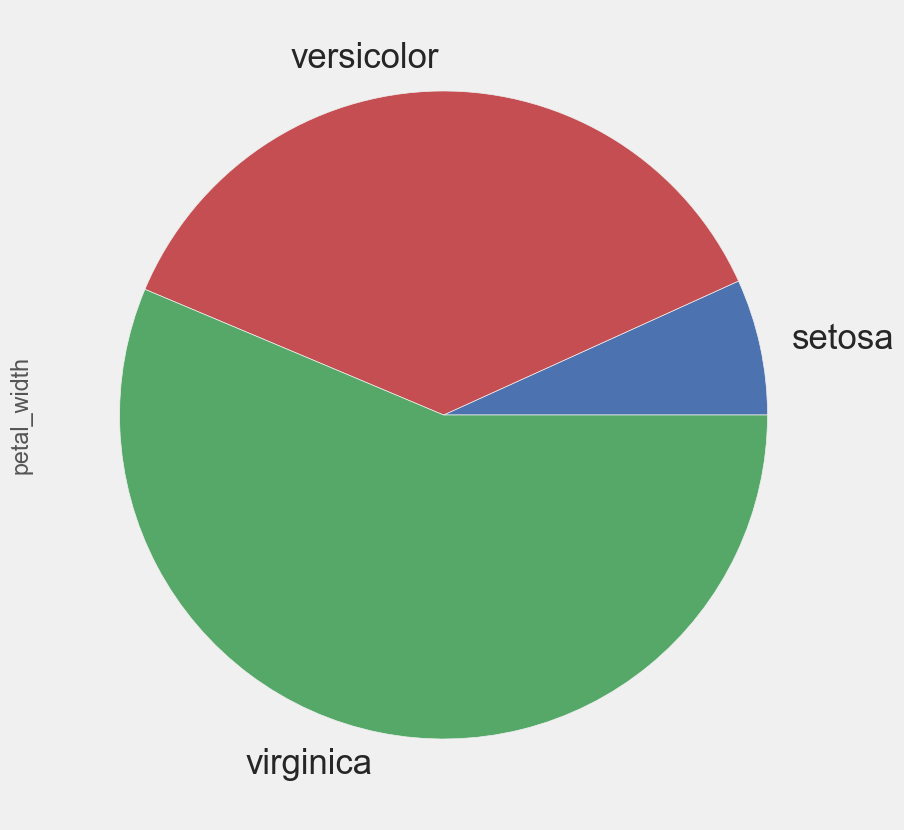

In [453]:
iris_avg.plot.pie(labels=["setosa","versicolor", "virginica"], 
                  colors=list("brg"), fontsize=25, figsize=(10,10))

<Axes: ylabel='petal_width'>

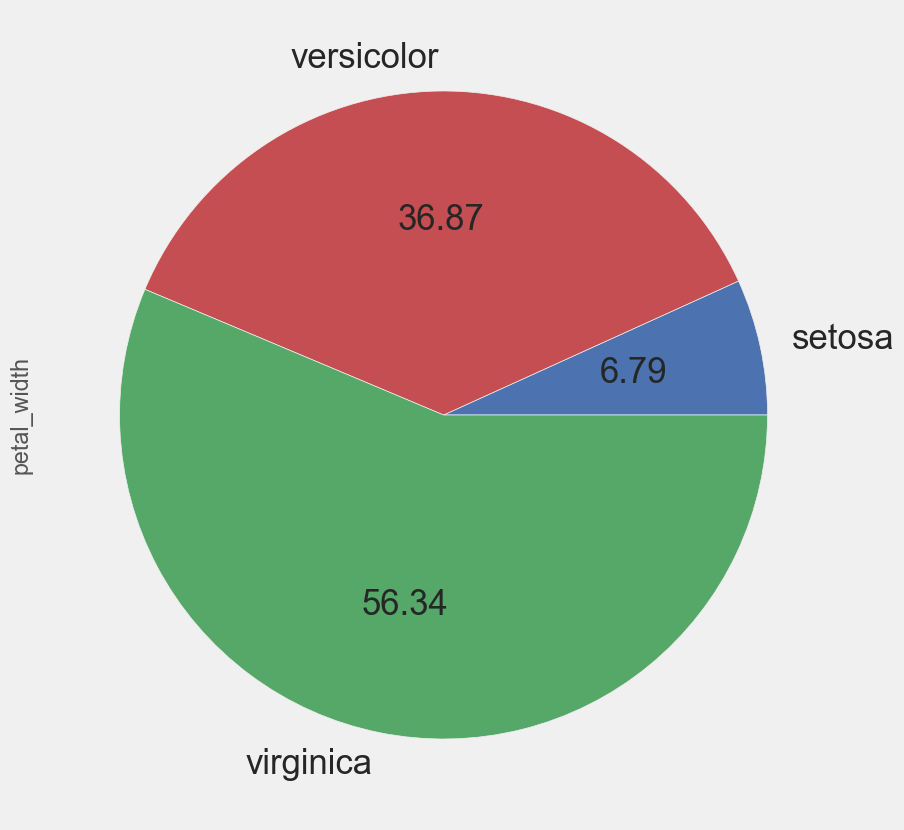

In [454]:
iris_avg.plot.pie(labels=["setosa","versicolor", "virginica"], colors=list("brg"), 
           autopct='%.2f', fontsize=25, figsize=(10,10))

## Density chart

<Axes: ylabel='Density'>

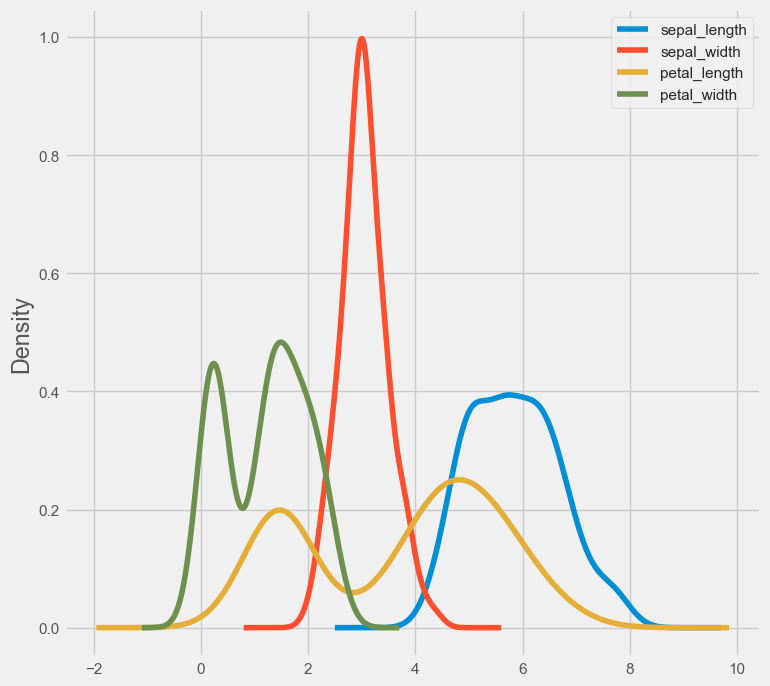

In [455]:
iris.plot.kde()

## Scatter matrix

array([[<Axes: xlabel='star_rating', ylabel='star_rating'>,
        <Axes: xlabel='duration', ylabel='star_rating'>],
       [<Axes: xlabel='star_rating', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>]], dtype=object)

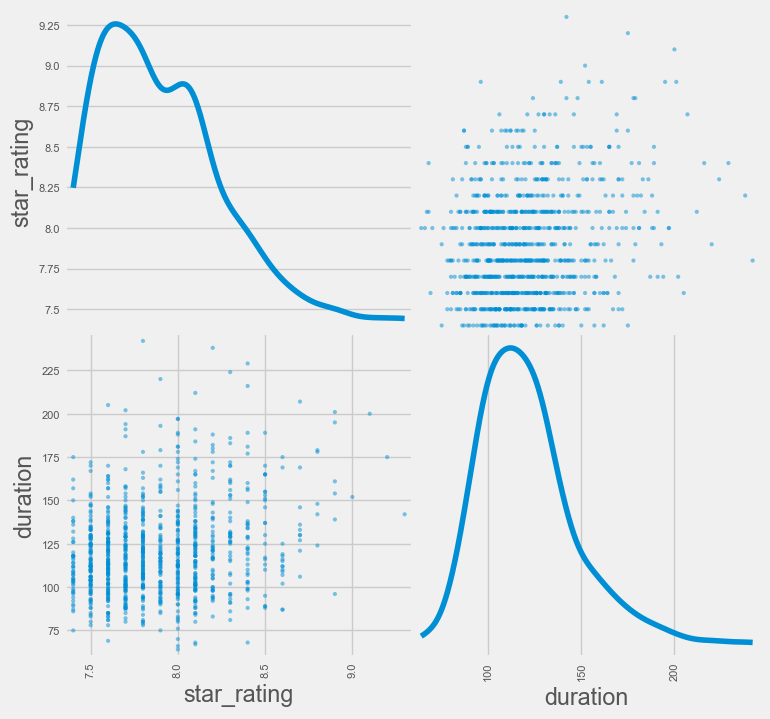

In [456]:
from pandas.plotting import scatter_matrix
scatter_matrix(movies, alpha=0.5, diagonal='kde')